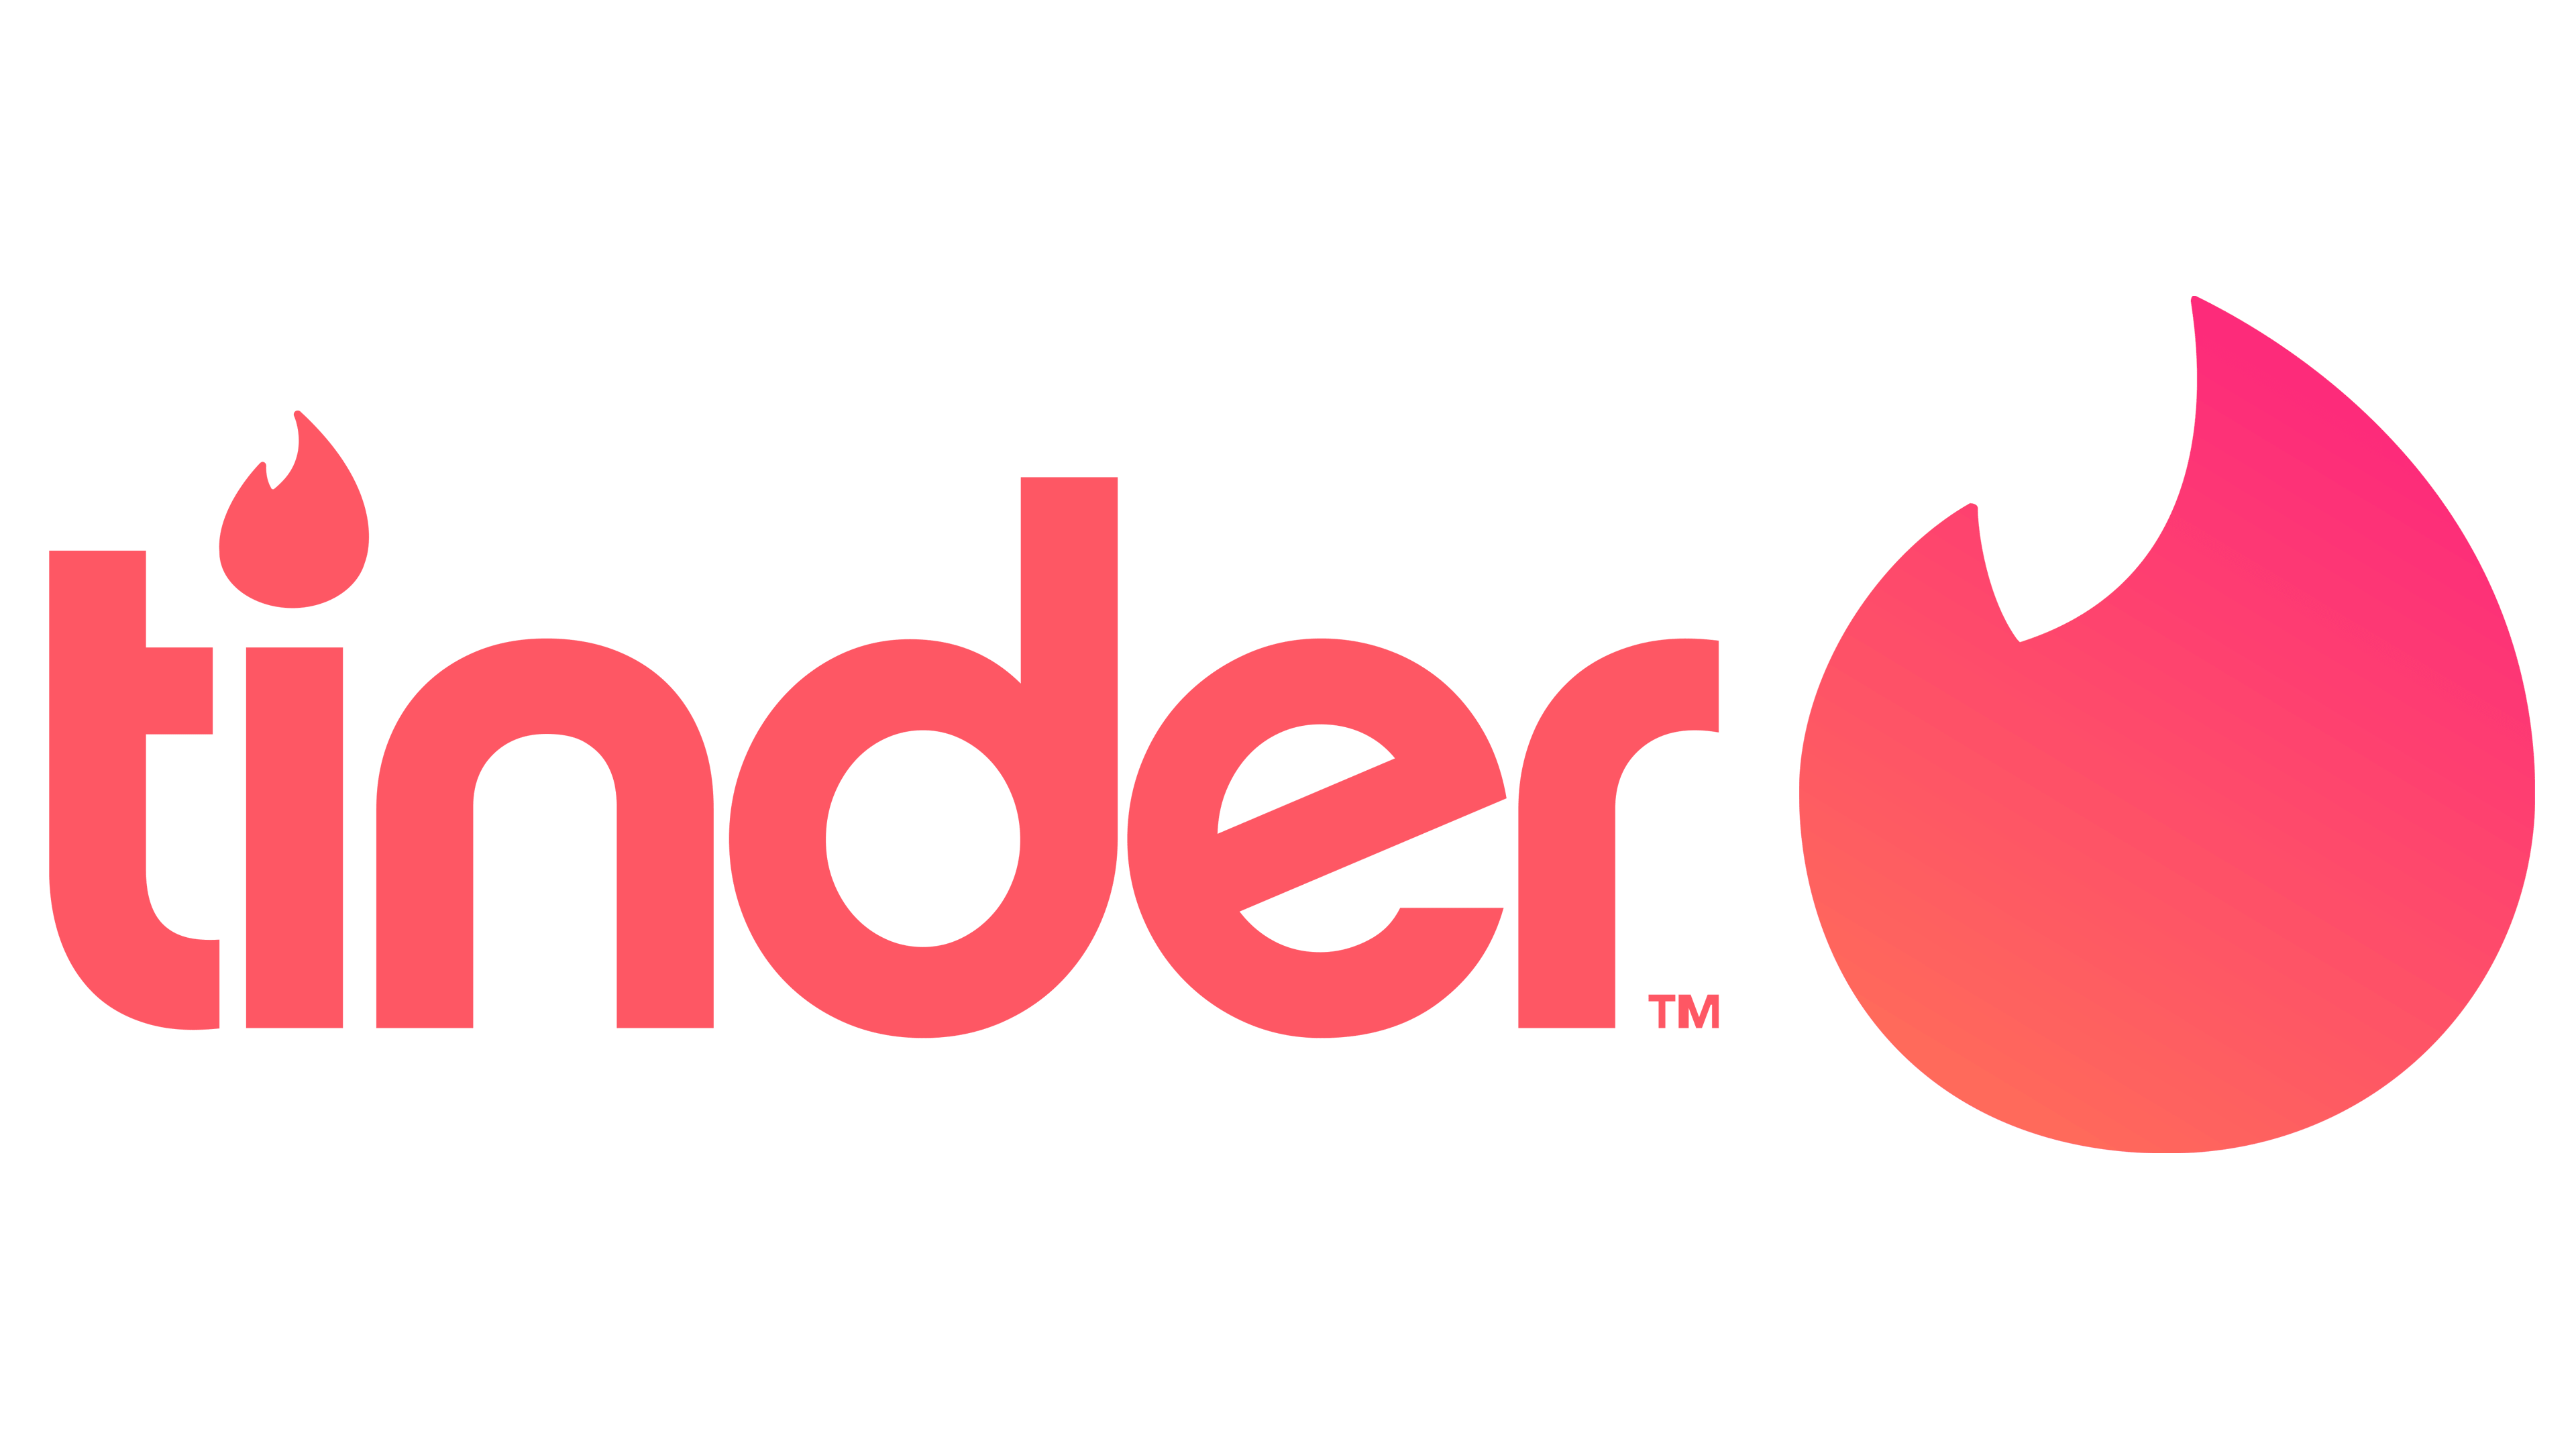

# **Speed Dating with Tinder**
## An Exploratory Data Analysis (EDA) project in Python

---

# **1. Importing libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import kruskal
from sklearn.preprocessing import LabelEncoder


# Set display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---

# **2. Initial exploration**

First, let's import and preview the dataset.

In [2]:
# Import the dataset
df = pd.read_csv("Speed_Dating_Data.csv", encoding="unicode-escape")

# Preview the dataset's first 5 rows
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Next, we'll look at the number of rows and columns in the dataset.

In [3]:
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))

Number of rows : 8378
Number of columns : 195


What columns are in the dataset, and what are their datatypes?

In [4]:
# List the dataset's columns
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [5]:
# Display the datatypes of each column
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


Now let's take a look at some summary statistics:

In [6]:
# View summary statistics of the dataset
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Missing values

Which columns have missing values?

In [7]:
# Check for missing values
pd.set_option('display.max_rows', None)

# Show the number of missing values for each column, sorted in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)
display(missing_values)

num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
shar7_2     6404
attr7_2     6394
fun7_2      6394
intel7_2    6394
fun5_3      6362
amb5_3      6362
shar2_3     6362
attr5_3     6362
amb7_3      6362
shar7_3     6362
sinc5_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
attr7_3     6362
intel5_3    6362
amb4_3      5419
sinc4_3     5419
attr4_3     5419
amb2_3      5419
fun2_3      5419
sinc2_3     5419
intel2_3    5419
intel4_3    5419
fun4_3      5419
shar4_3     5419
attr2_3     5419
mn_sat      5245
tuition     4795
shar1_3     4404
sinc3_3     4404
intel1_3    4404
fun1_3      4404
amb1_3      4404
intel3_3    4404
amb3_3      4404
fun3_3      4404
attr3_3     4404
you_call    4404
them_cal    4404
sinc1_3     4404
attr1_3     4404
date_3      4404
fun3_s      4378
attr3_s     4378
intel3_s    4378
amb3_s      4378
sinc3_s     4378
attr1_s     4282
sinc1_s     4282
shar1_s     4282
intel1_s    4282
fun1_s      4282
amb1_s      42

What is the proportion of missing values for each column?

In [8]:
# View the percentage of missing values in each column in descending order
missing_percentage = (df.isnull().mean() * 100)
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
shar7_2     76.438291
attr7_2     76.318931
fun7_2      76.318931
intel7_2    76.318931
fun5_3      75.936978
amb5_3      75.936978
shar2_3     75.936978
attr5_3     75.936978
amb7_3      75.936978
shar7_3     75.936978
sinc5_3     75.936978
sinc7_3     75.936978
intel7_3    75.936978
fun7_3      75.936978
attr7_3     75.936978
intel5_3    75.936978
amb4_3      64.681308
sinc4_3     64.681308
attr4_3     64.681308
amb2_3      64.681308
fun2_3      64.681308
sinc2_3     64.681308
intel2_3    64.681308
intel4_3    64.681308
fun4_3      64.681308
shar4_3     64.681308
attr2_3     64.681308
mn_sat      62.604440
tuition     57.233230
shar1_3     52.566245
sinc3_3     52.566245
intel1_3    52.566245
fun1_3      52.566245
amb1_3      52.566245
intel3_3    52.566245
amb3_3      52.566245
fun3_3      52.566245
attr3_3     52.566245
you_call    52.566245
them_cal    52.566245
sinc1_3   

In [9]:
# Create a dataframe of the missing values and their percentages
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']

# Display percentage of missing values in each column
missing_percentage_df.head()

,Column,Missing Percentage
0,iid,0.000000
1,id,0.011936
2,gender,0.000000
3,idg,0.000000
4,condtn,0.000000


Let's visualise the percentage of missing values in each column:

In [10]:
# Visualise missing values by column
fig = px.bar(missing_percentage_df, 
             x='Column', 
             y='Missing Percentage', 
             title='Percentage of missing values by column',
             labels={'Missing Percentage': '% of missing values', 'Column': 'Column name'},
             height=600)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()

We can see significant proportions of missing values in the following columns:

- `undergrad`: This refers to the school students attended for their undergrad degree, which may not have applied to all participants.

- `mn_sat` and `tuition`: These are derived from Barron’s college data, meaning missing values might correspond to participants whose undergraduate institutions were not listed in the database or participants who did not provide this information.

- `income`: This value is taken from census data and is based on the median income of households in the participant's zip code. Missing values indicate they are from abroad or did not provide their zip code.

- `expnum`: This field, referring to the number of partners participants expected to match with, was included in the initial questionnaire participants filled out before participating but may have been optional or included only for certain waves (=events).

- `attr4_1`, `sinc4_1`, `intel4_1`, `fun4_1`, `amb4_1` and `shar4_1`: Attributes participants thought members of their own sex looked for in the opposite sex. This question may not have been mandatory or included in all waves.

- `attr5_1`, `sinc5_1`, `intel5_1`, `fun5_1`, `amb5_1` and `shar5_1`: How participants thought others perceive them on the six personality attributes. As above, this may not have been mandatory or included in all waves.

- `attr1_s`, `sinc1_s`, `intel1_s`, `fun1_s`, `amb1_s`, `shar1_s`, `attr3_s`, `sinc3_s`, `intel3_s`, `fun3_s` and `amb3_s`: These fields were completed during a questionnaire handed out halfway through the event. The 50% completion rate for these suggests that the halfway questionnaire was optional or not included for all waves, or that many participants did not attend the event or stay beyond halfway.

- `attr7_2`, `sinc7_2`, `intel7_2`, `fun7_2`, `amb7_2`, `shar7_2`, `attr4_2`, `sinc4_2`, `intel4_2`, `fun4_2`, `amb4_2`, `shar4_2`, `attr2_2`, `sinc2_2`, `intel2_2`, `fun2_2`, `amb2_2`, `shar2_2`, `attr5_2`, `sinc5_2`, `intel5_2`, `fun5_2` and `amb5_2`: These fields were filled in during a post-event questionnaire, which was mandatory for participants to receive their matches. Other questions in this questionnaire had a high completion rate (as participants likely wanted to see who they matched with). These fields, therefore, could have been optional, or not included in the post-event questionnaire for all waves.

- `you_call` to `amb5_3`: The columns on the right-hand side of the dataset contain a lot of missing values. These fields were completed as part of a follow-up questionnaire sent 3-4 weeks after participants had received their matches. Many participants, having already received their matches, may have not filled in this questionnaire. The fields `numdat_3` and `num_in_3` have a particularly high proportion of missing values, since participants could only fill these in if they had been on a date with one of their matches - suggesting that most participants did not opt to meet their matches again after the event.

---

# **3. Selecting columns for analysis**

Our analysis aims to identify how racial biases affect match decisions, and to compare the influence of racial and social factors on matches to non-demographic factors in the dataset (such as personality).

We will therefore keep the following columns for analysis:

`iid`: unique id for each participant

`wave`: the wave of speed dates in which the date took place

`match`: 1 = yes, (i.e. if both `dec` and `dec_o` are "1"), 0 = no

`dec`: participant's decision whether they want to see their partner again during the match (1 = yes, 0 = no)

`dec_o`: partner's decision (1 = yes, 0 = no)

`attr_o`: rating by partner on the night of the event, for all 6 attributes

`samerace`: whether or not participant and partner were of the same race, 1 = yes, 0 = no

`race`: participant's race, as identified by the participant (categories coded numerically)

`race_o`: race of partner

`imprace`: How important is it to you (1-10) that a person you date be of the same racial/ethnic background?

`gender`: participant's gender, female = 0, male = 1

`age`: participant's age

`age_o` age of partner

`zipcode`: What was the zipcode of the area where you grew up? (proxy for socioeconomic status)

`income`: Median household income based on zipcode using the Census Bureau website:
        http://venus.census.gov/cdrom/lookup/CMD=LIST/DB=C90STF3B/LEV=ZIP 
        When there is no income it means that they are either from abroad or did not enter their zip code.

`field_cd`: participant's field of study (coded numerically)

`prob`: How likely do you think it is that this person will say “yes” for you? (1 = not probable, 10 = extremely probable) (completed after a speed date)

`exphappy`: Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?

`satis_2`: Overall, how satisified were you with the people you met? (1 = not at all satisfied, 10 = extremely satisfied)

`attr3_1`: participant's self-evaluation of their own attractiveness (1-10) **prior to** the experiment

`attr3_2`: participant's self-evaluation of their own attractiveness (1-10) **after** the experiment

- How participants scored their date (graded numerically 1-10):

`attr`: attractiveness

`sinc`: sincerity

`intel`: intelligence

`fun`: fun

`amb`: ambition

`shar`: shared hobbies/interests

In [11]:
# Identify columns to keep for analysis
columns_to_keep = ["iid", "wave", "match", "dec", "dec_o",  "attr_o", "samerace", "race", "race_o", "imprace", "gender", "age", "age_o", "zipcode", "income", "field_cd", "prob", "exphappy", "satis_2", "attr3_1", "attr3_2", "attr", "sinc", "intel", "fun", "amb", "shar"]

In [12]:
# Keep a copy of the unfiltered frame for sanity checks
df_unfiltered = df.copy()

# Same as above, but this time for unique participants only
df_unfiltered_unique = df.drop_duplicates(subset="iid", keep="first").copy()

In [13]:
# Filter the dataset so it only includes the required columns for analysis

df = df[columns_to_keep]

df.head()

,iid,wave,match,dec,dec_o,attr_o,samerace,race,race_o,imprace,gender,age,age_o,zipcode,income,field_cd,prob,exphappy,satis_2,attr3_1,attr3_2,attr,sinc,intel,fun,amb,shar
0,1,1,0,1,0,6.0,0,4.0,2.0,2.0,0,21.0,27.0,"60,521","69,487.00",1.0,6.0,3.0,6.0,6.0,6.0,6.0,9.0,7.0,7.0,6.0,5.0
1,1,1,0,1,0,7.0,0,4.0,2.0,2.0,0,21.0,22.0,"60,521","69,487.00",1.0,5.0,3.0,6.0,6.0,6.0,7.0,8.0,7.0,8.0,5.0,6.0
2,1,1,1,1,1,10.0,1,4.0,4.0,2.0,0,21.0,22.0,"60,521","69,487.00",1.0,NaN,3.0,6.0,6.0,6.0,5.0,8.0,9.0,8.0,5.0,7.0
3,1,1,1,1,1,7.0,0,4.0,2.0,2.0,0,21.0,23.0,"60,521","69,487.00",1.0,6.0,3.0,6.0,6.0,6.0,7.0,6.0,8.0,7.0,6.0,8.0
4,1,1,1,1,1,8.0,0,4.0,3.0,2.0,0,21.0,24.0,"60,521","69,487.00",1.0,6.0,3.0,6.0,6.0,6.0,5.0,6.0,7.0,7.0,6.0,6.0


In [14]:
# Check number of columns in the filtered dataset
print(f"The dataset now has {len(df.columns)} columns.")

The dataset now has 27 columns.


---

# **4. Cleaning and column validation & exploration**

### 4.1 Dealing with duplicates

Let's clean the filtered dataset up. First, we'll check for duplicates.

In [15]:
# Check shape of dataset before duplicates are removed
before_duplicates = df.shape
print(before_duplicates)

(8378, 27)


In [16]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"The dataset contains {duplicates} duplicate rows.")

The dataset contains 7 duplicate rows.


Let's remove those duplicate rows.

In [17]:
# Drop duplicate rows
df = df.drop_duplicates()

# Check shape of dataset after duplicates are removed
after_duplicates = df.shape
print(after_duplicates)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"The dataset contains {duplicates} duplicate rows.")

(8371, 27)
The dataset contains 0 duplicate rows.


### 4.2 Handling missing values

Now let's look again at missing values in the filtered dataset.

In [18]:
# Check the number of null values in each column of the filtered dataset
df.isnull().sum()

iid            0
wave           0
match          0
dec            0
dec_o          0
attr_o       206
samerace       0
race          63
race_o        73
imprace       79
gender         0
age           95
age_o        104
zipcode     1064
income      4098
field_cd      82
prob         303
exphappy     101
satis_2      912
attr3_1      105
attr3_2      912
attr         196
sinc         271
intel        290
fun          344
amb          706
shar        1061
dtype: int64

Some columns, like "race", are critical for our analysis. Rows with values for these represent a small proportion of the data, so we can safely drop them.

In [19]:
# Drop rows with missing values for key columns
df = df.dropna(subset=["race", "race_o", "imprace"])

Now let's deal with some of the other values.

We'll fill the missing values in the 'attr_o' column with the mean of the column within each wave and gender combination.

In [20]:
# Impute missing values in the 'attr_o' column with the mean of the column grouped by 'wave' and 'gender'
df['attr_o'] = df.groupby(['wave', 'gender'])['attr_o'].transform(lambda x: x.fillna(x.mean()))

We'll fill the age-related columns with the mean for each wave, to control for any differences between waves.

In [21]:
# Impute 'age' and 'age_o' using group-specific mean (grouped by 'wave')
df['age'] = df.groupby('wave')['age'].transform(lambda x: x.fillna(x.mean()))
df['age_o'] = df.groupby('wave')['age_o'].transform(lambda x: x.fillna(x.mean()))

Next, let's deal with missing zip codes. It's important to keep these in because this is an indicator that the person is from outside of the US. We'll fill them with "missing".

In [22]:
# Check value counts for "zipcode" column
df["zipcode"].value_counts(dropna=False).head()

zipcode
NaN       960
0         352
10,021    138
10,027    126
10,025    119
Name: count, dtype: int64

In [23]:
# Fill missing zipcode values with "missing"
df["zipcode"] = df["zipcode"].fillna("missing")

df["zipcode"].value_counts(dropna=False).head()

zipcode
missing    960
0          352
10,021     138
10,027     126
10,025     119
Name: count, dtype: int64

In [24]:
# Strip "income" column of commas and convert to float
df["income"] = df["income"].str.replace(",", "").astype(float)

Now we'll deal with `income`. By default, we'll try to impute the median income by zip code. If that's not possible, we'll impute the median by wave (or, if that fails, by field of study, or by the median for the entire dataset as a last resort).

In [25]:
warnings.simplefilter(action='ignore', category=RuntimeWarning)  # Suppress the warning message this code would otherwise throw

# Impute missing values in the 'income' column using the median income by 'zipcode', 'wave', and 'field_cd'
# Step 1: Impute income using the median income by 'zipcode'
df['income'] = df.groupby('zipcode')['income'].transform(lambda x: x.fillna(x.median()))

# Step 2: Fallback to the median income by 'wave'
df['income'] = df.groupby('wave')['income'].transform(lambda x: x.fillna(x.median()))

# Step 3: Fallback to the median income by 'field_cd'
df['income'] = df.groupby('field_cd')['income'].transform(lambda x: x.fillna(x.median()))

# Step 4: Fallback to the median income of the entire dataset
df['income'] = df['income'].fillna(df['income'].median())

Now let's fill the missing values in the `field_cd` column (participant's field of study). We'll fill the column with "Missing".

In [26]:
df["field_cd"] = df["field_cd"].fillna("Missing")

Now let's deal with the fields `prob`, `attr3_1`, `exphappy`, `fun1_1` and `amb1_1`. As these are numeric columns, we'll fill them a stratified mean by wave, gender and race for better precision.

In [27]:
# Define a function to impute missing values with the average by wave, gender, and race, rounded to the nearest integer
def impute_mean(group):
    if group.isnull().all():  # If all values are NaN, return NaN
        return group
    return group.fillna(round(group.mean()))  # Round the mean before imputing

# Apply imputation to relevant columns
columns_to_impute = ["prob", "attr3_1", "attr3_2", "exphappy", "satis_2", "attr", "sinc", "intel", "fun", "amb", "shar"]

for col in columns_to_impute:
    df[col] = df.groupby(["wave", "gender", "race"])[col].transform(impute_mean)

Let's check those null values again:

In [28]:
# Check null counts
df.isnull().sum()

iid          0
wave         0
match        0
dec          0
dec_o        0
attr_o       0
samerace     0
race         0
race_o       0
imprace      0
gender       0
age          0
age_o        0
zipcode      0
income       0
field_cd     0
prob         0
exphappy     0
satis_2     49
attr3_1      8
attr3_2     49
attr         0
sinc         0
intel        0
fun          0
amb          0
shar        16
dtype: int64

There's just a few remaining null values in `satis_2`, `attr3_1`, `attr3_2` and `shar`. We'll fill them with the mean of the overall dataset.

In [29]:
def fill_missing_with_mean(df, columns):
    """
    Fill missing values in specified columns with the global mean (rounded to nearest integer).
    
    Args:
        df (pd.DataFrame): The dataframe to modify.
        columns (list): List of column names to fill missing values in.

    Returns:
        pd.DataFrame: The dataframe with imputed values.
    """
    for col in columns:
        df[col] = df[col].fillna(df[col].mean().round())
    return df

# List of columns to impute
columns_to_impute = ["satis_2", "attr3_1", "attr3_2", "shar"]

# Apply the function
df = fill_missing_with_mean(df, columns_to_impute)


Let's perform one more check to make sure that all columns have been filled:

In [30]:
# Check null counts one more time
df.isnull().sum()

iid         0
wave        0
match       0
dec         0
dec_o       0
attr_o      0
samerace    0
race        0
race_o      0
imprace     0
gender      0
age         0
age_o       0
zipcode     0
income      0
field_cd    0
prob        0
exphappy    0
satis_2     0
attr3_1     0
attr3_2     0
attr        0
sinc        0
intel       0
fun         0
amb         0
shar        0
dtype: int64

Good, there are no more missing values in the dataset! Let's move to the next phase of cleaning.

### 4.3 Cleaning and exploring categorical columns

Now we need to check if the values in all of the columns are as they should be. First let's check the datatypes of the columns again.

In [31]:
# Check datatypes again
df.dtypes

iid           int64
wave          int64
match         int64
dec           int64
dec_o         int64
attr_o      float64
samerace      int64
race        float64
race_o      float64
imprace     float64
gender        int64
age         float64
age_o       float64
zipcode      object
income      float64
field_cd     object
prob        float64
exphappy    float64
satis_2     float64
attr3_1     float64
attr3_2     float64
attr        float64
sinc        float64
intel       float64
fun         float64
amb         float64
shar        float64
dtype: object

#### `wave`

First we'll check the "wave" column.

In [32]:
 # Check that all values in "wave" fall in expected range (1-21)
df["wave"].between(1, 21).all()

np.True_

In [33]:
wave_counts = df["wave"].value_counts().sort_index()

display(wave_counts)

wave
1     200
2     592
3     160
4     648
5     178
6      40
7     512
8     200
9     800
10    162
11    882
12    392
13    140
14    683
15    683
16     96
17    280
18     72
19    450
20     84
21    965
Name: count, dtype: int64

All waves are represented in the dataset, but all equally. Let's visualise the distribution in a histogram.

In [34]:
# Plot number of dates per wave
fig = px.bar(wave_counts, 
             x=wave_counts.index, 
             y=wave_counts.values, 
             title='Number of dates per wave',
             labels={'x': 'Wave', 'y': 'Number of dates'},
             height=600)
fig.show()

The number of dates varied greatly from wave to wave. What about the number of participants per wave?

First, we need to know how many individuals took part in the study:

In [35]:
# Filter for unique participants (keeping the first record for each participant only)
unique_participants = df.drop_duplicates(subset="iid", keep="first").copy()

# View number of participants
print(f"There are {unique_participants.shape[0]} unique participants in the dataset.")

There are 544 unique participants in the dataset.


#### `gender`

What is the balance of female and male participants?

In [36]:
# Count number of participants by gender
gender_counts = unique_participants["gender"].value_counts(dropna=False)

print(f"{gender_counts[0]} of the participants were women and {gender_counts[1]} were men.")

269 of the participants were women and 275 were men.


The distribution of men and women participants seems fairly balanced.

Now we can visualise the number of unique participants that took place in each wave:

In [37]:
# Plot number of participants in each wave
fig = px.bar(unique_participants["wave"].value_counts().sort_index(), 
             title='Number of participants per wave',
             labels={'x': 'Wave', 'y': 'Number of participants'},
             height=600)
fig.show()

The pattern for the number of participants per wave follows what we'd expect, given the distribution of the number of dates per wave above.

#### `match`

Are all values in "match" as they should be (0 or 1)?
What is the proportion of matches to non-matches in the dataset?

In [38]:
# Count how many dates resulted in a match vs. no match (1 = match, 0 = no match)
match_value_counts = df["match"].value_counts(dropna=False)

print(match_value_counts)

match
0    6868
1    1351
Name: count, dtype: int64


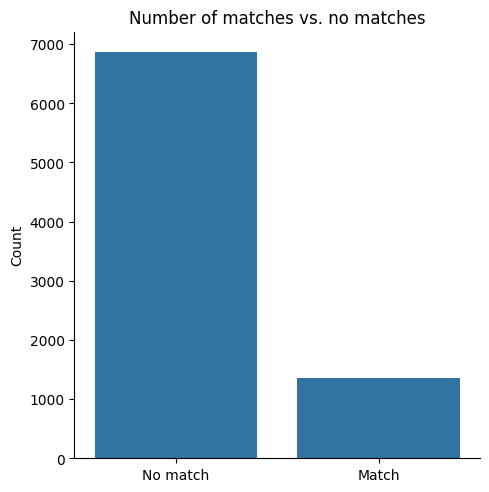

In [39]:
# Visualise the number of matches vs. no matches
sns.catplot(kind="bar", data = match_value_counts)
# Add title and labels
plt.title("Number of matches vs. no matches")
plt.xlabel("")
plt.ylabel("Count")
# Make the labels more descriptive
plt.xticks(ticks=[0, 1], labels=["No match", "Match"])
plt.show()

Roughly 1 in 5 encounters resulted in a match.

#### `dec` & `dec_o`

Let's check the values in the columns `dec`and `dec_o`. The value counts should be the same in both columns:

In [40]:
dec_counts = df["dec"].value_counts(dropna=False)

print(dec_counts)

dec
0    4763
1    3456
Name: count, dtype: int64


In [41]:
dec_o_counts = df["dec_o"].value_counts(dropna=False)

print(dec_o_counts)

dec_o
0    4768
1    3451
Name: count, dtype: int64


Both are the same, as expected.

#### `attr_o`

Now let's check that the value "attr_o" falls within expected boundaries (it shouldn't be much more than 10).

In [42]:
print(f"Lowest attractivness rating in the dataset: {df['attr_o'].min()}")
print(f"Highest attractivness rating in the dataset: {df['attr_o'].max()}")

Lowest attractivness rating in the dataset: 0.0
Highest attractivness rating in the dataset: 10.5


In [43]:
fig = px.histogram(df, x="attr_o", title="Distribution of attractiveness ratings given to participants by their partners")
fig.show()

Judgements on attractiveness seem to follow a left-skewed normal distribution, with values tending slightly towards the mid- to higher end. Very high attractiveness scores seem to be more frequent than very low ones.

#### `same_race`

Now let's look at the `same_race` column. How much of the time were participants paired with someone identified as belonging to the same race?

In [44]:
# Count how many dates were between participants of the same race vs. different races (1 = same, 0 = different)
same_race_col_counts = df["samerace"].value_counts(dropna=False)

print(same_race_col_counts)

samerace
0    4916
1    3303
Name: count, dtype: int64


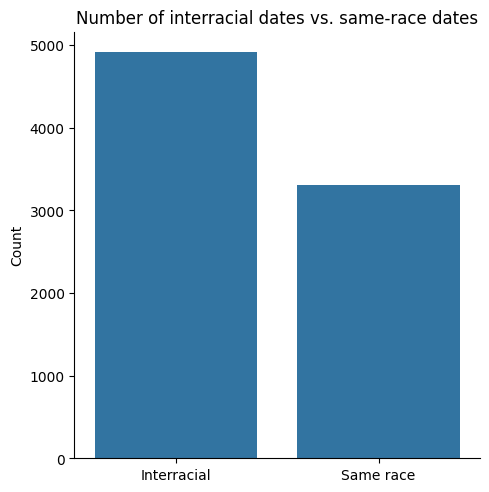

In [45]:
# Visualise the number of dates between people of the same vs. different race
sns.catplot(kind="bar", data=same_race_col_counts)
# Add title and labels
plt.title("Number of interracial dates vs. same-race dates")
plt.xlabel("")
plt.ylabel("Count")
# Make the labels more descriptive
plt.xticks(ticks=[0, 1], labels=["Interracial", "Same race"])
plt.show()


In [46]:
# Calculate proportion of dates that were between people of the same race
different_race_count = same_race_col_counts.loc[0]

same_race_count = same_race_col_counts.loc[1]

same_race_proportion = same_race_count / (different_race_count + same_race_count)

same_race_percentage = same_race_proportion * 100

same_race_percentage_rounded = round(same_race_percentage)

print(f"{same_race_percentage_rounded}% of dates were between people identified as being of the same race.")

40% of dates were between people identified as being of the same race.


More often than not, participants were paired up with someone identified as being of a different race to them.

#### `race`

Now we'll look at another key column, `race`: what is the distribution of participants of different races in the dataset?

In [47]:
# Count the values in the race column
unique_participants["race"].value_counts()

race
2.0    303
4.0    136
3.0     42
6.0     37
1.0     26
Name: count, dtype: int64

The values are coded numerically. Let's map them to their real meanings.

In [48]:
race_mapping_dict = {
    1 : "Black/African American",
    2 : "European/Caucasian-American",
    3 : "Latino/Hispanic American",
    4 : "Asian/Pacific Islander/Asian-American",
    5 : "Native American",
    6 : "Other"
    }

# Remap "race" column values
df["race"] = df["race"].map(race_mapping_dict)
df["race_o"] = df["race_o"].map(race_mapping_dict)
unique_participants["race"] = unique_participants["race"].map(race_mapping_dict)
unique_participants["race_o"] = unique_participants["race_o"].map(race_mapping_dict)

# Display value counts again
unique_participants["race"].value_counts()

race
European/Caucasian-American              303
Asian/Pacific Islander/Asian-American    136
Latino/Hispanic American                  42
Other                                     37
Black/African American                    26
Name: count, dtype: int64

In [49]:
# Calculate race percentages
race_percentages = unique_participants["race"].value_counts(normalize=True) * 100

Now we can visualise the distribution:

In [50]:
# Convert race percentages to a DataFrame
race_distribution = race_percentages.reset_index()
race_distribution.columns = ["Race", "Percentage"]

# Create a pie chart
fig = px.pie(race_distribution, 
             names="Race",  # Labels (races)
             values="Percentage",  # Percentages
             title="Distribution of Participants by Race",
             hole=0.3,  # Adjust to 0 for a full pie chart, or 0.3 for a donut chart
             color_discrete_sequence=px.colors.qualitative.Set3)  # Custom color scheme (optional)

# Display the pie chart
fig.show()



Over half of participants self-identified as "European/Caucasian-American," followed by a quarter who self-identified as "Asian/Pacific Islander/Asian-American."

Black/African American and Latino/Hispanic American participants were numerically fewer in this study than their estimated proportions in the U.S. population at the time (2004), when Black/African Americans made up approximately 12%, and Latino/Hispanic Americans accounted for around 12-16%.

In contrast, participants identifying as Asian/Pacific Islander/Asian-American were represented at a higher proportion than in the general U.S. population, where this group constituted approximately 5% in 2004.

How does this look when broken down by gender?

In [51]:
# Calculate race distribution separately for females and males
female_race_counts = unique_participants[unique_participants["gender"] == 0]["race"].value_counts(normalize=True) * 100
male_race_counts = unique_participants[unique_participants["gender"] == 1]["race"].value_counts(normalize=True) * 100

# Convert to DataFrames and format percentages
female_race_distribution = female_race_counts.round().astype(int).apply(lambda x: str(x) + "%").reset_index()
female_race_distribution.columns = ["Race", "Percentage of Women"]

male_race_distribution = male_race_counts.round().astype(int).apply(lambda x: str(x) + "%").reset_index()
male_race_distribution.columns = ["Race", "Percentage of Men"]

# Display tables
print("Female Race Distribution:\n", female_race_distribution)
print("\nMale Race Distribution:\n", male_race_distribution)

Female Race Distribution:
                                     Race Percentage of Women
0            European/Caucasian-American                 52%
1  Asian/Pacific Islander/Asian-American                 26%
2               Latino/Hispanic American                  9%
3                                  Other                  6%
4                 Black/African American                  6%

Male Race Distribution:
                                     Race Percentage of Men
0            European/Caucasian-American               59%
1  Asian/Pacific Islander/Asian-American               24%
2                                  Other                8%
3               Latino/Hispanic American                6%
4                 Black/African American                4%


In [52]:
# Filter for unique female participants
unique_female_participants = unique_participants[unique_participants["gender"] == 0]

# Reset index to make "Race" a column
female_race_counts = unique_female_participants["race"].value_counts().reset_index()
female_race_counts.columns = ["Race", "proportion"]

# Create a pie chart
fig = px.pie(female_race_counts, 
             names="Race",  # Labels (races)
             values="proportion",  # Counts
             title="Distribution of Female Participants by Race",
             hole=0.3,  # Adjust to 0 for a full pie chart, or 0.3 for a donut chart
             color_discrete_sequence=px.colors.qualitative.Set3)  # Custom color scheme (optional)

# Display the pie chart
fig.show()

In [53]:
# Filter for unique female participants
unique_male_participants = unique_participants[unique_participants["gender"] == 1]

# Count the number of unique female participants by race
male_race_counts = unique_male_participants["race"].value_counts().reset_index()
male_race_counts.columns = ["Race", "Count"]

# Create a pie chart
fig = px.pie(male_race_counts, 
             names="Race",  # Labels (races)
             values="Count",  # Counts
             title="Distribution of Male Participants by Race",
             hole=0.3,  # Adjust to 0 for a full pie chart, or 0.3 for a donut chart
             color_discrete_sequence=px.colors.qualitative.Set3)  # Custom color scheme (optional)

# Display the pie chart
fig.show()

We'll explore these columns more later. For now, let's move on to other columns and check that their values are as expected.

#### `imprace`

The `imprace` column asks participants to evaluate how important it is to them that their partner is of the same race as them, on a scale of 1-10. What is the distribution of these values in the dataset?

In [54]:
# Count the values in the "imprace" column
imprace_value_counts = df["imprace"].value_counts(dropna=False)

# Sort the values by index
imprace_value_counts = imprace_value_counts.sort_index()

display(imprace_value_counts)

imprace
0.0        8
1.0     2772
2.0      945
3.0      969
4.0      504
5.0      651
6.0      518
7.0      537
8.0      659
9.0      407
10.0     249
Name: count, dtype: int64

In [55]:
# Distribution of the value attributed to the importance of being of the same race as your partner, according to participants
fig = px.histogram(df, 
             x=df["imprace"],
             title="Participants' perceived importance of race in dating",
             labels={"count": "Distribution", "imprace": "Score attributed to importance of race (1-10)"},
             height=600)
fig.show()

Most people attribute very little importance to race, although interestingly very few people attribute absolutely zero importance to being of the same race as your partner.
There's also a slight peak in the middle at "5" and on the higher end at "8". We'll see later on how that changes depending on different demographics.

For now, let's continue our data validation. We'll check the `age` column.

#### `age`

What is the distribution of ages in the dataset?

In [56]:
# View summary statistics for the "age" column (filtered for unique participants)
unique_participants["age"].describe()

count    544.000000
mean      26.347668
std        3.771663
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

The mean and median age both round to 26, with the mean being slightly higher, suggesting a slightly right-skewed normal distribution. Standard deviation isn't too high, suggesting a concentration somewhere in the mid-20s for most participants. There aren't any implausible values in the dataset: all participants were above 18, and the oldest participant is 55.

Let's see what the distribution looks like.

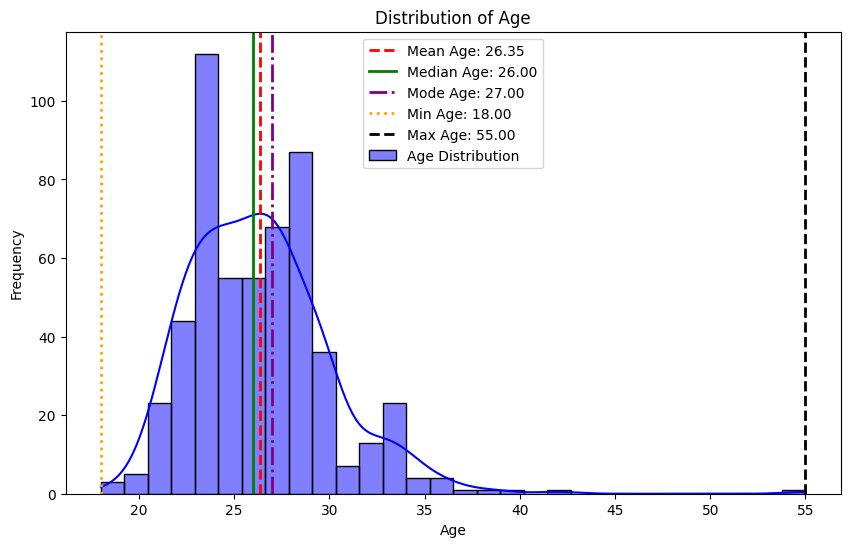

In [57]:
# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(unique_participants['age'], bins=30, kde=True, color='blue', label='Age Distribution')

# Calculate summary statistics
mean_age = unique_participants['age'].mean()
median_age = unique_participants['age'].median()
mode_age = unique_participants['age'].mode()[0]
min_age = unique_participants['age'].min()
max_age = unique_participants['age'].max()

# Plot mean, median and mode lines
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Median Age: {median_age:.2f}')
plt.axvline(mode_age, color='purple', linestyle='-.', linewidth=2, label=f'Mode Age: {mode_age:.2f}')
plt.axvline(min_age, color='orange', linestyle=':', linewidth=2, label=f'Min Age: {min_age:.2f}')
plt.axvline(max_age, color='black', linestyle='--', linewidth=2, label=f'Max Age: {max_age:.2f}')

# Add title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()

As expected, participants' ages follow a right-skewed normal distribution with the mean age (26.35) being very close to the median (26). Most participants were in their twenties.

The fairly long tail towards the right suggests that participants of 40 or above did participate, but were slight outliers.

Does age representation change wave by wave?

In [58]:
# Plot the distribution of ages in the dataset in box plots by wave, showing a line for mean age for each one
fig = px.box(unique_participants, 
             x="wave", 
             y="age",
             title="Distribution of participants' ages by wave",
             labels={"age": "Age", "wave": "Wave"},
             height=600)
fig.update_traces(marker=dict(size=3))
fig.add_trace(go.Scatter(x=df["wave"].unique(), y=df.groupby("wave")["age"].mean(), mode="lines", name="Mean age", line=dict(color="red", width=2)))
fig.show()

In [59]:
# Calculate average minimum and maximum age per wave
avg_min_age = unique_participants.groupby("wave")["age"].min().mean()
avg_max_age = unique_participants.groupby("wave")["age"].max().mean()

print(f"Average youngest age per wave: {avg_min_age:.2f}.")
print(f"Average oldest age per wave: {avg_max_age:.2f}.")

Average youngest age per wave: 21.38.
Average oldest age per wave: 34.76.


In [60]:
# Find the wave with the highest starting age
wave_max_age = unique_participants.groupby("wave")["age"].min().idxmax()
# Find the highest starting age in that wave
max_age = unique_participants.groupby("wave")["age"].min().max()

print(f"The highest starting age for any given wave was {int(max_age)}.")

The highest starting age for any given wave was 23.


In [61]:
# Find all waves where the highest starting age was 23
waves_min_age = unique_participants.groupby("wave")["age"].min()
waves_max_age_23 = waves_min_age[waves_min_age == 23]

print(f"The following waves had the highest starting age of 23: {waves_max_age_23.index.tolist()}.")

The following waves had the highest starting age of 23: [6, 18, 20].


One 55-year-old participated in wave 18, which explains why the mean age for that wave (which already had the highest minimum age than most, at around 23) was higher than its median.

Meanwhile, the age with the youngest participants by far was wave 5, with a very compact age range of 15-20. According to the data dictionary, this wave was reserved for undergraduates.


Everything seems in order with the `age` column. Now let's check `age_o`, the age of the other participant, which should have the same shape.

#### `age_o`

In [62]:
# Compare summary statistics for the "age" and "age_o" columns

# Print summary statistics for the "age" column (filtered for unique participants)
print('Summary statistics for the "age" column:')

print(unique_participants["age"].describe())

print()

# Print summary statistics for the "age_o" column (filtered for unique participants)
print('Summary statistics for the "age_o" column:')

print(unique_participants["age_o"].describe())

Summary statistics for the "age" column:
count    544.000000
mean      26.347668
std        3.771663
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

Summary statistics for the "age_o" column:
count    544.000000
mean      26.494485
std        4.343871
min       20.000000
25%       23.000000
50%       25.000000
75%       29.000000
max       38.000000
Name: age_o, dtype: float64


There are the same number of unique participants in both columns, but interestingly, the summary statistics are not the same.

The `age_o` column has a very slightly higher mean age and a higher standard deviation, but the oldest participant represented in the column (38) is considerably younger than the oldest participant in the `age` column.

This can be explained by the way we have filtered the `unique_participants` dataframe: we kept the first record only for each participant id, so not all speed dates are represented for each participant. Therefore, while all participants are represented in the `age` column, not all participants are represented in the `age_o` column.

We can verify this with a quick sanity check:

In [63]:
print("Summary statistics for cleaned dataset (left) vs. raw dataset (right)")
print()

print("For whole dataset:")

print("Cleaned data")
print(df[["age", "age_o"]].describe())
print("Raw data")
print(df_unfiltered[["age", "age_o"]].describe())

print()

print("For unique participants only:")
# Print summary statistics for "age" and "age_o" columns from unique_participants dataset
print("Cleaned data")
print(unique_participants[["age", "age_o"]].describe())

# Print summary statistics for "age" and "age_o" columns from df_unfiltered_unique dataset
print("Raw data")
print(df_unfiltered_unique[["age", "age_o"]].describe())

Summary statistics for cleaned dataset (left) vs. raw dataset (right)

For whole dataset:
Cleaned data
               age        age_o
count  8219.000000  8219.000000
mean     26.351115    26.353053
std       3.560303     3.559055
min      18.000000    18.000000
25%      24.000000    24.000000
50%      26.000000    26.000000
75%      28.000000    28.000000
max      55.000000    55.000000
Raw data
               age        age_o
count  8283.000000  8274.000000
mean     26.358928    26.364999
std       3.566763     3.563648
min      18.000000    18.000000
25%      24.000000    24.000000
50%      26.000000    26.000000
75%      28.000000    28.000000
max      55.000000    55.000000

For unique participants only:
Cleaned data
              age       age_o
count  544.000000  544.000000
mean    26.347668   26.494485
std      3.771663    4.343871
min     18.000000   20.000000
25%     24.000000   23.000000
50%     26.000000   25.000000
75%     28.000000   29.000000
max     55.000000   38.00000

The statistics for the `age` column tend to be relatively unaffected by filtering for unique participants or through the cleaning process, and the `age_o` column's summary statistics remain the same before and after cleaning. Howver, the `age_o` column's summary statistics are affected significantly by filtering for unique participants, particularly the min and max ages and the standard deviation. We can therefore attribute this change to the filtering process.

As age isn't our most important variable for our analysis it won't impact our findings greatly, so we'll leave things as they are for these columns.

Let's have a look at the `zipcode` column.

#### `zipcode`

In [64]:
df["zipcode"].value_counts(dropna=False)

zipcode
missing      960
0            352
10,021       138
10,027       126
10,025       119
19,087        48
92,064        41
7,410         41
10,012        39
11,235        39
10,128        37
91,011        37
80,131        36
20,817        34
7,726         34
10,019        32
8,904         31
7,936         30
60,521        29
10,028        29
8,820         26
50,354        22
136           22
11,570        22
395,001       22
7,078         22
91,789        22
11,572        22
10,029        22
90,034        22
471,001       22
10,024        22
67,111        22
11,001        22
91,754        22
2,140         22
45,213        22
33,418        22
19,380        22
8,805         22
12,563        22
78,110        22
94,121        22
16,146        22
10,594        22
92,028        22
95,831        22
12,020        22
84,108        22
48,306        22
94,536        22
26,223        22
96,797        22
2,420         22
77,546        21
98,115        21
21,701        21
80,304        21
10,023

We've dealt with null values, but there's still a large number of problematic "0" zip codes. It is impossible to have a single-digit zip code in the US, and given the large number of these, we can imagine that this indicates a missing value or someone born outside of the USA (as implied by the data dictionary). Let's merge these into the "missing" category.

In [65]:
df.loc[df["zipcode"] == "0", "zipcode"] = "missing"

df["zipcode"].value_counts(dropna=True)

zipcode
missing      1312
10,021        138
10,027        126
10,025        119
19,087         48
92,064         41
7,410          41
10,012         39
11,235         39
10,128         37
91,011         37
80,131         36
20,817         34
7,726          34
10,019         32
8,904          31
7,936          30
60,521         29
10,028         29
8,820          26
2,140          22
11,001         22
67,111         22
91,754         22
92,028         22
2,420          22
96,797         22
84,108         22
48,306         22
50,354         22
136            22
11,570         22
78,110         22
10,029         22
395,001        22
33,418         22
8,805          22
94,121         22
16,146         22
95,831         22
45,213         22
10,594         22
10,024         22
91,789         22
12,563         22
11,572         22
94,536         22
19,380         22
26,223         22
7,078          22
471,001        22
12,020         22
90,034         22
78,666         21
50,450         21
11

That looks better. There's still the matter of those commas which shouldn't be there - zip codes in the US should be 5 numbers in the format #####.

In [66]:
df["zipcode"] = df["zipcode"].str.replace(",", "")

df["zipcode"].value_counts(dropna=True)

zipcode
missing    1312
10021       138
10027       126
10025       119
19087        48
92064        41
7410         41
10012        39
11235        39
10128        37
91011        37
80131        36
20817        34
7726         34
10019        32
8904         31
7936         30
60521        29
10028        29
8820         26
2140         22
11001        22
67111        22
91754        22
92028        22
2420         22
96797        22
84108        22
48306        22
50354        22
136          22
11570        22
78110        22
10029        22
395001       22
33418        22
8805         22
94121        22
16146        22
95831        22
45213        22
10594        22
10024        22
91789        22
12563        22
11572        22
94536        22
19380        22
26223        22
7078         22
471001       22
12020        22
90034        22
78666        21
50450        21
11212        21
10536        21
22015        21
10023        21
98115        21
77546        21
6098         21


Looking better. There's still the matter of a handful of values which are under or over 5 digits. We could add leading or trailing zeroes for those that are too short to be in a valid format here, remove trailing zeroes on ones that are too long, or even outright get rid of rows which don't meet format requirements.

However, as this is not a key column for our analysis and it's difficult to know without further context why these values are the way they are, we can leave this column as it is for now.

#### `income`

On to the `income` field, which doesn't directly show participants' income, but rather the median household income based on their zip code.</br>
As we saw above, nearly half of these values are missing. No `income` data means either that participants were from abroad or did not enter their zip code.

What does the distribution of this field look like?

In [67]:
# Summary statistics for "income" column
unique_participants["income"].describe()

count       544.000000
mean      43977.660846
std       13774.424902
min        8607.000000
25%       35963.000000
50%       43844.000000
75%       50518.750000
max      109031.000000
Name: income, dtype: float64

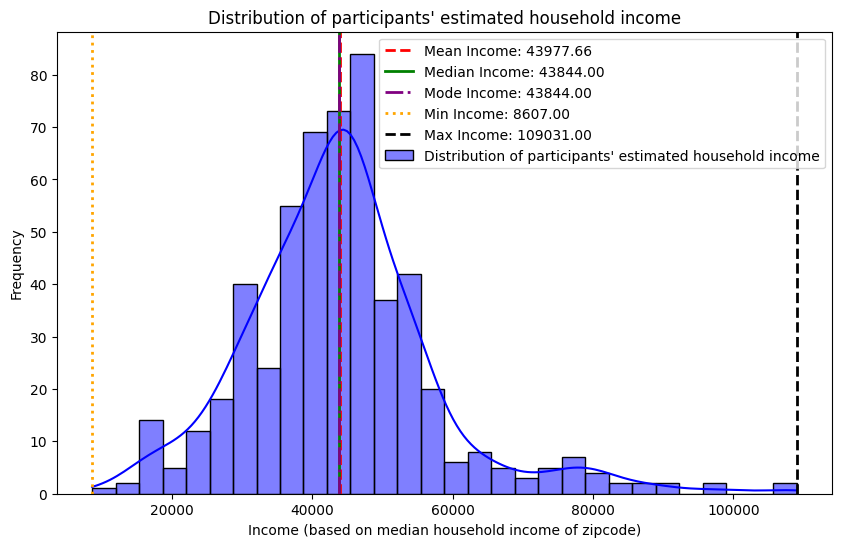

In [68]:
# Plot a histogram of participants' estimated income

# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(unique_participants['income'], bins=30, kde=True, color='blue', label="Distribution of participants' estimated household income")

# Calculate summary statistics
mean_age = unique_participants['income'].mean()
median_age = unique_participants['income'].median()
mode_age = unique_participants['income'].mode()[0]
min_age = unique_participants['income'].min()
max_age = unique_participants['income'].max()

# Plot mean, median and mode lines
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Income: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Median Income: {median_age:.2f}')
plt.axvline(mode_age, color='purple', linestyle='-.', linewidth=2, label=f'Mode Income: {mode_age:.2f}')
plt.axvline(min_age, color='orange', linestyle=':', linewidth=2, label=f'Min Income: {min_age:.2f}')
plt.axvline(max_age, color='black', linestyle='--', linewidth=2, label=f'Max Income: {max_age:.2f}')

# Add title and labels
plt.title("Distribution of participants' estimated household income")
plt.xlabel('Income (based on median household income of zipcode)')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()

In [69]:
# Visualise income distribution in a boxplot
fig = px.box(unique_participants, 
             y="income", 
             title="Distribution of participants' estimated household income",
             labels={"income": "Income"},
             height=600)
fig.show()

Income follows a normal distribution, with the median very closely aligned with the mean and mode. All measures of centre, including median income, are just under the $44,000 mark, with a clear drop-off at around $58,000. Most participants come from areas where the median income is in the range of $35k-$50k.

There is a slight rightwards skew due to higher incomes, with more outliers coming from high-income areas than low-income areas.

The highest estimated income in the dataset is $109,031. Does this align to a particular zip code?

In [70]:
# Show "income" and "zipcode" columns for all participants whose income is the maximum value
max_income_participants = unique_participants[unique_participants["income"] == unique_participants["income"].max()][["iid", "income", "zipcode"]]
display(max_income_participants)

,iid,income,zipcode
1224,88,109031.0,"10,514"


The highest `income` in the dataset comes from one participant who comes from zip code 10514, which corresponds to **Chappaqua, New York**, a hamlet with a high median income.

What about the lowest income?

In [71]:
# Show "income" and "zipcode" columns for all participants whose income is the minimum value
min_income_participants = unique_participants[unique_participants["income"] == unique_participants["income"].min()][["iid", "income", "zipcode"]]
display(min_income_participants)

,iid,income,zipcode
3471,241,8607.0,"10,454"


The lowest estimated income in the dataset is $8607 and is attributed to an individual from 10454, a postcode in The Bronx, where median incomes are significantly lower than the median for the United States.

We can validate the `income` column. Let's move on to participants' field of study, recorded in the `field_cd` column.

#### `field_cd`

This column contains numerically coded values corresponding to a the participant's generalised field of study. It is less precise than the `field` column, but it has the advantage of being a lot cleaner and having fewer values to sift through.

We'll start by checking its values.

In [72]:
# Show all values from the "field_cd" column
print("Value counts for whole dataset:")
print(df["field_cd"].value_counts(dropna=False))
print()
print("Value counts for unique participants:")
print(unique_participants["field_cd"].value_counts(dropna=False))

Value counts for whole dataset:
field_cd
8.0        1898
10.0        993
5.0         845
13.0        705
3.0         672
1.0         656
9.0         618
11.0        468
6.0         323
7.0         240
2.0         207
15.0        186
4.0         142
14.0        126
18.0         52
16.0         40
Missing      19
12.0         19
17.0         10
Name: count, dtype: int64

Value counts for unique participants:
field_cd
8.0        130
10.0        61
5.0         56
1.0         48
13.0        46
3.0         45
9.0         40
11.0        30
6.0         21
7.0         17
2.0         14
15.0        11
4.0          9
14.0         7
16.0         3
18.0         3
Missing      1
12.0         1
17.0         1
Name: count, dtype: int64


All values are as expected, but the numeric coding doesn't help us much. Let's map them onto their actual meanings.

In [73]:
# Create a dictionary to map the "field_cd" values to their corresponding field of study
field_dict = {
    1.0 : "Law",
    2.0 : "Math",
    3.0 : "Social Science, Psychologist",
    4.0 : "Medical Science, Pharmaceuticals, and Bio Tech",
    5.0 : "Engineering",
    6.0 : "English/Creative Writing/Journalism",
    7.0 : "History/Religion/Philosophy",
    8.0 : "Business/Econ/Finance",
    9.0 : "Education, Academia",
    10.0 : "Biological Sciences/Chemistry/Physics",
    11.0 : "Social Work",
    12.0 : "Undergrad/undecided",
    13.0 : "Political Science/International Affairs",
    14.0 : "Film",
    15.0 : "Fine Arts/Arts Administration",
    16.0 : "Languages",
    17.0 : "Architecture",
    18.0 : "Other"
}

# Remap "field_cd" column values
df["field_cd"] = df["field_cd"].map(field_dict)
unique_participants["field_cd"] = unique_participants["field_cd"].map(field_dict)

# Display value counts again
print("Value counts for whole dataset:")
print(df["field_cd"].value_counts(dropna=False))
print()
print("Value counts for unique participants:")
print(unique_participants["field_cd"].value_counts(dropna=False))

Value counts for whole dataset:
field_cd
Business/Econ/Finance                             1898
Biological Sciences/Chemistry/Physics              993
Engineering                                        845
Political Science/International Affairs            705
Social Science, Psychologist                       672
Law                                                656
Education, Academia                                618
Social Work                                        468
English/Creative Writing/Journalism                323
History/Religion/Philosophy                        240
Math                                               207
Fine Arts/Arts Administration                      186
Medical Science, Pharmaceuticals, and Bio Tech     142
Film                                               126
Other                                               52
Languages                                           40
NaN                                                 19
Undergrad/undecided     

That looks better. Now we can visualise the column's distribution and see which fields are the most common among participants. We'll do this for unique participants only.

N.B. For non-US readers: the value "Undergrad/undecided" is a particularity of US higher education, as many undergraduates in the USA studying under the liberal arts model are not required to choose their major (main subject of study) until around the end of their second year of study. This would not be the case in British or French higher ed institutions, where students choose their specialism when applying for a course.

In [74]:
# Visualise the distribution of participants by field of study

# Count occurrences and reset index
field_counts = unique_participants["field_cd"].value_counts().reset_index()
field_counts.columns = ["Field of study", "Number of participants"]

# Create a horizontal bar chart
fig = px.bar(field_counts,
             x="Number of participants",
             y="Field of study",
             orientation="h",
             title='Distribution of participants by field of study',
             height=600,
             category_orders={"Field of study": field_counts["Field of study"].tolist()}
             )

# Show the chart
fig.show()


**Business, Economics and Finance** students made up the largest category. That makes sense - the event was organised by a business school, after all.

There were also a large number of participants studying STEM subjects and the social and political sciences. By contrast, there were fewer participants studying in the Arts and Humanities.

With `field_cd` validated, we can now move on to the `prob` column.

#### `prob`

This column contains participants' answer to the question: "*How probable do you think it is that this person will say 'yes' for you?*"</br>
It is a measure of self-confidence.

Answers should be on a scale of 1-10:

1 = not probable</br>
10 = extremely probable

Let's check that values fall within the expected range.


In [75]:
# Show summary statistics for the "prob" column
df["prob"].describe()

count    8219.000000
mean        5.203796
std         2.098356
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: prob, dtype: float64

Some participants seem to have marked their probability of getting a "yes" as "0", which isn't within the expected range of values according to the data dictionary, but is still plausible.</br>
No values are below 0 or over 10, so the range seems OK.

Let's see the column's distribution.

In [76]:
# Plot the distribution of participants' perceived probability of being liked by their partners
fig = px.histogram(df,
                   x="prob",
                   title="Distribution of participants' perceived probability of being liked by their partners",
                   labels={"count": "Distribution", "prob": "Probability"},
                   height=600)
fig.show()

The distribution follows a normal shape, with the mean and median answer falling right in the middle (5).

Most people seemingly thought their chances of their partner wanting to see them again were middling. People tended to be more likely to be gently optimistic (6, 7) than slightly pessimistic (3, 4).

Very low `prob` scores tended to be more frequent than very high scores, suggesting that a lack of confidence was more common than extreme confidence.


We can now move on to the `exphappy` column.

#### `exphappy`

This column contains answers to the question: "*Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
during the speed-dating event?*"

It is a good measure of participants' pre-events expectations and degree of optimism regarding their dating experience. This can provide insight into:

- How initial attitudes correlate with actual outcomes (e.g. match rates)
- Individual differences in general optimism, social confidence, or prior dating experiences

It will also allow us to see whether or not participants' degree of optimism is correlated with demographic factors such as race.

Let's check its distribution.

In [77]:
# Show summary statistics for the "exphappy" column
df["exphappy"].describe()

count    8219.000000
mean        5.529626
std         1.730418
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: exphappy, dtype: float64

In [78]:
# Visualise the distribution of participants' expected happiness with the people they will meet
fig = px.histogram(df,
                   x="exphappy",
                   title="Distribution of participants' expected happiness with the people they will meet",
                   labels={"count": "Distribution", "exphappy": "Expected happiness"},
                   height=600)
fig.show()

Values fall between 1 and 10, as expected. Most values fall within the 5-7 range, suggesting moderate optimism.</br>
However, the mean (5.5) is slightly lower than the median (6), suggesting that a few lower values may be pulling the mean down.

This could indicate that while most participants expect a moderately positive experience, a subset of them have particularly low expectations, which influences the overall average.

Are there particular demographic factors correlated with these lower expectations? We'll answer this question later on in this analysis. 

For now, we'll move on to the next column, `satis_2` - which allows us to see compare participants' expectations with the reality of the speed dating experience.

#### `satis_2`

This column answers the question "*"Overall, how satisfied were you with the people you met?*", answered the day after participating in the speed dating event.

It is a key column which will allow us to measure participants' actual satisfaction with the speed dating experience.

This will allow us to explore questions such as whether satisfaction with the dating experience is influenced by demographic and social factors such as `race`.

In [79]:
# Show summary statistics for the "satis_2" column
df["satis_2"].describe()

count    8219.000000
mean        5.689865
std         1.771865
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: satis_2, dtype: float64

In [80]:
# Visualise the distribution of "exphappy" and "satis_2" in the same plot
fig = make_subplots(rows=1, cols=2, subplot_titles=("Expected happiness with people met (pre-event)", "Satisfaction with people met (post-event)"))

# Add histograms for "satis_2" and "exphappy"
fig.add_trace(go.Histogram(x=df["exphappy"], name="Expected happiness"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["satis_2"], name="Satisfaction score"), row=1, col=2)

# Make scales the same
fig.update_yaxes(matches='y')
fig.update_xaxes(matches='x')

# Update layout
fig.update_layout(title_text="Expected happiness vs. Post-event satisfaction",
                  height=600,
                  showlegend=False)

# Show plot
fig.show()

As above, all values fall within the expected range.

Compared to the `exphappy` column, we can see that a greater number of people put a gently satisfied "6" compared to a cautious estimation of "5".

Likewise, the number of people putting an "8" for satisfaction increased post-event compared to their predictions before the event.

However, there may be another story lurking here - we can see that the number of people giving a very low score of "2" has gone up almost proportionally to the decline in the number of people who put a "3" or a "4". The number of people who put an "extremely satisfied" 10 also declined compared to the number who predicted this same score.

Could it be that while the majority were more satisfied with their dating experience than expected, certain sub-groups of people ended up being disappointed? And might this phenomenon be hurting the overall match rate?

This will be a key question to explore in our main analysis. For now, let's continue with column validation.

##### `attr3_1`

This column is another self-evaluation metric: it measures **how attractive participants think they are** compared to others of their gender.</br>
As such, it is another measure of self-confidence, this time focusing on physical attractiveness.

Again - and this will be the case for all the other columns we will be validating from here on in - values should be on a scale of 1-10.

In [81]:
# Show summary statistics for the "attr3_1" column
df["attr3_1"].describe()

count    8219.000000
mean        7.085290
std         1.394859
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: attr3_1, dtype: float64

In [82]:
# Plot the distribution of participants' self-evaluated attractiveness score
fig = px.histogram(df,
                   x="attr3_1",
                   title="Distribution of participants' self-evaluated attractiveness score",
                   labels={"attr3_1": "Perceived attractiveness"},
                   height=600)

# Manually set the y-axis label
fig.update_layout(yaxis_title="Distribution")

# Show the figure
fig.show()

Interestingly, self-evaluations of attractiveness (prior to the experiment) tended to be higher than their perceived chances of being liked by their partner, with values tending toward the higher end of the scale (with all measures of center at 7).

This could suggest that most participants went into the experiment knowing their self-worth, but being unsure about whether others would see the qualities they saw in themselves.

It would be interesting to see whether these self-evaluated attractiveness scores changed after the experiment, and if so, whether the speed dating experience affected their sense of self-worth positively or negatively. This would be a key indicator of the impact of dating apps on a person's self-confidence.

Let's find out.

##### `attr3_2`

This column measures participants' self-evaluated attractiveness score **after** the experiment. It can be used to measure whether participants' sense of self-worth has changed over the course of the speed dating experiment.

Has participants' sense of self-confidence changed after the experiment?

In [83]:
# Show summary statistics for the "attr3_1" column
df["attr3_2"].describe()

count    8219.000000
mean        7.129578
std         1.329001
min         2.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: attr3_2, dtype: float64

In [84]:
# Plot the distribution of participants' self-evaluated attractiveness score
fig = px.histogram(df,
                   x="attr3_2",
                   title="Distribution of participants' self-evaluated attractiveness (after speed dating)",
                   labels={"attr3_2": "Perceived attractiveness"},
                   height=600)

# Manually set the y-axis label
fig.update_layout(yaxis_title="Distribution")

# Show the figure
fig.show()

There appears to be very little change after the experiment, with a very slight increase in the mean score. This suggests very slight improvements in people's sense of self-confidence overall, but it remains to be seen whether this is statistically significant, and whether this trend is the same across all racial groups.

Let's now check how participants were actually rated.

#### `attr`

The following six columns all deal with ratings that participants gave their partners according to the following criteria:

- Attractiveness (`attr`)
- Sincerity (`sinc`)
- Intelligence (`intel`)
- Fun (`fun`)
- Ambitiousness (`amb`)
- Shared Hobbies/Interests (`shar`)

We'll start with the `attr` column, which allows us to compare how participants thought they measured up with how they were actually rated.

In [85]:
# Show summary statistics for the "attr" column
df["attr"].describe()

count    8219.000000
mean        6.183526
std         1.929146
min         0.000000
25%         5.000000
50%         6.000000
75%         7.500000
max        10.000000
Name: attr, dtype: float64

In [86]:
# Plot the distribution of attractiveness scores given by participants to their partners
fig = px.histogram(df,
                   x="attr",
                   title="Distribution of attractiveness scores given by participants to their partners",
                   labels={"attr": "Attractiveness score"},
                   height=600)

# Manually set the y-axis label
fig.update_layout(yaxis_title="Distribution")

fig.show()

On the whole, participants tended to be slightly harsher with others than they were with themselves: mean and median attractiveness scores hovered around 6, compared to average the self-evaluation score of 7.

`sinc`

This column measures how sincere participants thought their partners were. It allows us to gauge perceived honesty and authenticity in interactions, which can be an important factor in attraction and relationship-building.

It also allows us to measure potential biases in how certain demographics view the sincerity of people of other demographics.

In [87]:
# Show summary statistics for the "sinc" column
df["sinc"].describe()

count    8219.000000
mean        7.179888
std         1.723451
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: sinc, dtype: float64

In [88]:
# Visualise the distribution of sincerity scores given by participants to their partners
fig = px.histogram(df,
                   x="sinc",
                   title="Distribution of sincerity scores",
                   labels={"sinc": "Sincerity score"},
                   height=600)
fig.show()

As with the last column, there are some zero values, but values still generally fall within a plausible range (0-10).

Average scores (mean and median) were relatively high for this column, hovering at around 7. It appears that people usually felt that their speed dating partners were honest and genuine in their interactions.

#### `intel`

This column sures how intelligent people thought their partners were, on a scale of 1-10.

As with previous columns, it may help us to evaluate social biases in dating (whether certain demographic groups tend to be perceived as less intelligent, and if so, by whom).

In [89]:
# Show summary statistics for the "intel" column
df["intel"].describe()

count    8219.000000
mean        7.373342
std         1.529269
min         0.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: intel, dtype: float64

In [90]:
# Visualise the distribution of intelligence scores given by participants to their partners
fig = px.histogram(df,
                   x="intel",
                   title="Distribution of intelligence scores",
                   labels={"intel": "Intelligence score"},
                   height=600)
fig.show()

The range of values follows the same pattern as previous "attribute" columns (0-10).

People were generally very generous on intelligence scores, with a mean and median of 7, a mode of 8, and a relatively large number of people giving their partner a 9 or a 10.</br>
(Perhaps the fact that participants were all students in higher education is an explanatory factor here?)

#### `fun`

This column measures how fun they thought their partner was.

In [91]:
 # Show summary statistics for the "fun" column
df["fun"].describe()

count    8219.000000
mean        6.400718
std         1.917754
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: fun, dtype: float64

In [92]:
# Visualise the distribution of fun scores given by participants to their partners
fig = px.histogram(df,
                   x="fun",
                   title="Distribution of fun scores",
                   labels={"fun": "Fun score"},
                   height=600)
fig.show()

Values fall within the expected range (0-10).

Here, the mean (6.4) is lower than the median and mode (7), showing that some lower scores pulled the mean down. The distribution of values here is a bit more balanced than for intelligence, though people still tended to be fairly positive about their partner's sense of fun (with most values falling between 5 and 8).

#### `amb`

This column measures how ambitious participants thought their partner was.

In [93]:
# Show summary statistics for the "amb" column
df["amb"].describe()

count    8219.000000
mean        6.789877
std         1.736125
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: amb, dtype: float64

In [94]:
# Visualise the distribution of ambition scores given by participants to their partners
fig = px.histogram(df,
                   x="amb",
                   title="Distribution of ambition scores",
                   labels={"amb": "Ambition score"},
                   height=600)
fig.show()

Values fall within the expected range (0-10).

People tended to perceive their partners as quite ambitious, with most values falling within the range of 6-8.
Again, while it is outside of the scope of this analysis, it would be interesting to see whether this is due to participants being in higher education, and how other factors correlate with this (e.g. age or field of study).

#### `shar`

This column measures to what extent participants felt that their partner shared the same interests and/or hobbies as them.

In [95]:
# Show summary statistics for the "shar" column
df["shar"].describe()

count    8219.000000
mean        5.475423
std         2.032515
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: shar, dtype: float64

In [96]:
# Visualise the distribution of shared interests scores given by participants to their partners
fig = px.histogram(df,
                   x="shar",
                   title="Distribution of shared interests scores",
                   labels={"shar": "Shared interests score"},
                   height=600)
fig.show()

Values fall within the expected range (0-10).

Here, the distribution of values is much more balanced, with the mean near the middle of the scale (5.4) and most values falling in the 4-7 range.</br>
This shows that although participants tended to be positive about their level of shared hobbies or interests more often than not, there was likely greater diversity in range of interests or hobbies that participants had than in how they perceived other traits, such as their partner's intelligence or level of ambition.

While it is not the driving question behind this analysis, it would be interesting to see which of these traits influence match rates more.

All columns are now validated. Now we can move onto our main exploratory analysis.

---

# **5. Exploratory analysis: Do racial factors affect match rates and confidence in dating?**

### 5.1 Match rates per racial group

First let's look to see whether there are any disparities in match rates by racial group.

In [97]:
# Calculate match rate per racial group
match_rates_by_race = df.groupby(df["race"])["match"].mean() * 100

# Convert to dataframe for visualisation
match_rates_df = match_rates_by_race.reset_index()

# Rename columns
match_rates_df.columns = ["Race", "Match rate (%)"]

In [98]:
# Plot match rates by racial group in descending order as a horizontal bar chart
match_rates_df = match_rates_df.sort_values(by="Match rate (%)", ascending=True)
fig = px.bar(match_rates_df,
             x="Match rate (%)",
             y="Race",
             title="Match rates by race",
             labels={"Match rate (%)": "Match rate (%)"},
             height=600)

# Add values next to the bars
fig.update_traces(texttemplate='%{x:.2f}%', textposition='outside')

fig.show()

There's a noticeable difference in top and lower match rates. While the match rate for Black/African American participants is 20.43%, Asian/Pacific Islander/Asian-American participants' match rate is 7% lower at 13.49%.

How does this look when you break it down by gender?

In [99]:
# Calculate match rate per racial group for women
match_rates_by_race_women = df[df["gender"] == 0].groupby("race")["match"].mean() * 100

# Calculate match rate per racial group for men
match_rates_by_race_men = df[df["gender"] == 1].groupby("race")["match"].mean() * 100

# Convert to dataframes for visualisation
match_rates_women_df = match_rates_by_race_women.reset_index()
match_rates_men_df = match_rates_by_race_men.reset_index()

# Rename columns
match_rates_women_df.columns = ["Race", "Match rate (%)"]
match_rates_men_df.columns = ["Race", "Match rate (%)"]

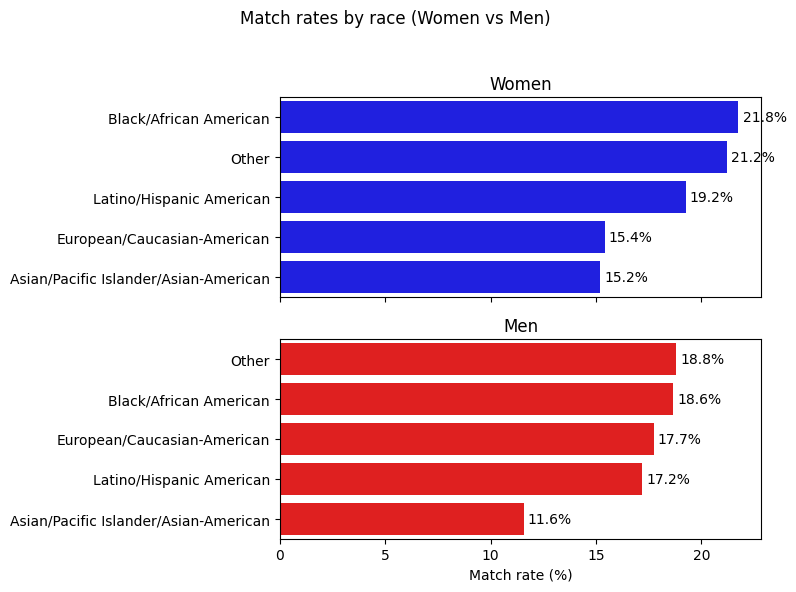

In [100]:
# Sort dataframes by "Match rate (%)" in descending order
match_rates_women_df = match_rates_women_df.sort_values(by="Match rate (%)", ascending=False)
match_rates_men_df = match_rates_men_df.sort_values(by="Match rate (%)", ascending=False)

# Reduce figure size for better screen fit
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Adjusted size

# Function to add labels to bars
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", padding=3)  # Format as percentage

# Plot for Women
ax1 = sns.barplot(
    data=match_rates_women_df, 
    x="Match rate (%)", 
    y="Race", 
    ax=axes[0], 
    color="blue"
)
axes[0].set_title("Women")
axes[0].set_ylabel("")  # Remove y-axis label
add_labels(ax1)  # Add percentage labels

# Plot for Men
ax2 = sns.barplot(
    data=match_rates_men_df, 
    x="Match rate (%)", 
    y="Race", 
    ax=axes[1], 
    color="red"
)
axes[1].set_title("Men")
axes[1].set_ylabel("")  # Remove y-axis label
add_labels(ax2)  # Add percentage labels

# Adjust layout for better spacing
plt.suptitle("Match rates by race (Women vs Men)")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensures spacing is well adjusted

# Show plot
plt.show()

Black/African American, Latina/Hispanic American and Asian/Pacific Islander/Asian-American women tend to have higher match rates than their male counterparts.

European/Caucasian-American males, on the other hand, have a slightly higher average match rate than females of the same category.

While Asian/Pacific Islander/Asian-American participants have the lowest match rate in both categories, there is still a significant-looking gap of almost 4% between the average match rate for Asian women (15.2%) and Asian men (11.6%).

The gap between the match rate for Asian males and the match rate for the category with the next lowest match rate (Latino/Hispanic American) is much greater than that of Asian women's match rate compared to the next lowest match rate in the female category: between the lowest and second lowest match rate for men there is a gap of almost 6%, compared to only 0.2% for women.

This could suggest that Asian/Pacific Islander/Asian-American men, in particular, face greater difficulties in dating than people from other racial groups in the same gender, which may lead to lower trust in and satisfaction with the dating process. To check this, we need to look at not just match rate but also "yes" rates from participants' partners, as well as satisfaction scores.

#### 5.1.1 Hypothesis testing to check statistical significance of gaps in match rates between different races

Let's run a quick hypothesis test to check if these results are statistically significant.

Since the data is not normally distributed and the variances across racial groups are not equal, we use the Kruskal-Wallis test, a non-parametric alternative to ANOVA. This test helps us check whether the average match rates differ significantly between racial groups for men and women.

We conduct the test separately for each gender to see whether race has a statistically significant impact on match outcomes within each group.

##### **Hypotheses:**

**Null Hypothesis (H₀)**: There is no difference in the distribution of match rates between racial groups within each gender.

**Alternative Hypothesis (H₁)**: There is a significant difference in the distribution of match rates between at least two racial groups within each gender.

If the p-value is below 0.05, we reject H₀, meaning race may be a factor influencing match rates for that gender.

In [101]:
# Group match rates by race for each gender
women_match_rates = [df[df["race"] == race]["match"] for race in df[df["gender"] == 0]["race"].unique()]
men_match_rates = [df[df["race"] == race]["match"] for race in df[df["gender"] == 1]["race"].unique()]

# Run Kruskal-Wallis test (non-parametric alternative to ANOVA, which we can't use because the data is not normally distributed)
kruskal_women = stats.kruskal(*women_match_rates)
kruskal_men = stats.kruskal(*men_match_rates)

# Print results
print("Kruskal-Wallis Test Results:")
print(f"Women: p-value = {kruskal_women.pvalue:.4f}")
print(f"Men: p-value = {kruskal_men.pvalue:.4f}")

# Interpret results
alpha = 0.05  # Significance level

if kruskal_women.pvalue < alpha:
    print("There is a significant difference in match rates between racial groups for women.")
else:
    print("No significant difference in match rates between racial groups for women.")

if kruskal_men.pvalue < alpha:
    print("There is a significant difference in match rates between racial groups for men.")
else:
    print("No significant difference in match rates between racial groups for men.")

Kruskal-Wallis Test Results:
Women: p-value = 0.0001
Men: p-value = 0.0001
There is a significant difference in match rates between racial groups for women.
There is a significant difference in match rates between racial groups for men.


##### **Interpretation of results**
The Kruskal-Wallis test returned a p-value of 0.0001 for both women and men. Since this is well below the 0.05 threshold, we can confidently reject the null hypothesis for each gender.

This means that the differences in average match rates between racial groups are statistically significant — that is, it's very unlikely these differences are due to random chance.

In other words, race appears to play a meaningful role in match rates, for both women and men.

# 5.2 Participant's "Yes Rate" by race

Are match rates influenced more by the participant's decisions or by their partners' decisions?

If a match rate for a given racial group is low, for example, it would be useful to know whether this is due to participants of this category being more selective about who they want to see for a second date than participants of other racial groups, or whether it is rather because members of these groups tend to experience lower rates of second-date approval from their partners.

We will now analyse two metrics to try to answer this question:

- Participant Yes rate (% of people the participant said "yes" to seeing again)
- Partner Yes rate (% of people that said "yes" to seeing the participant again)

We will start with the participant's "yes" rate, to see to what extent participants' selectiveness varies by racial group.

In [102]:
# Calculate Participant Yes Rate (by race)
participant_yes_rate_by_race = df.groupby("race")["dec"].mean() * 100

# Convert to dataframe for visualisation
participant_yes_rate_df = participant_yes_rate_by_race.reset_index()

# Rename columns
participant_yes_rate_df.columns = ["Race", "Participant Yes rate (%)"]

In [103]:
# Plot Participant Yes rates by racial group in descending order as a horizontal bar chart
participant_yes_rate_df = participant_yes_rate_df.sort_values(by="Participant Yes rate (%)", ascending=True)
fig = px.bar(participant_yes_rate_df,
             x="Participant Yes rate (%)",
             y="Race",
             title='How often do participants say "Yes" to a second date?',
             labels={"Participant Yes rate (%)": "Participant Yes rate (%)"},
             height=600)

# Add values next to the bars
fig.update_traces(texttemplate='%{x:.2f}%', textposition='outside')

fig.show()

Black/African American participants tend to be say "yes" to a second date the most often, with a participant Yes rate of 50.72%.

European/Caucasian-American participants tend to be the most selective, with an average participant Yes rate of around 39%.

How does this look when it is broken down by gender?

In [104]:
# Calculate participant yes rate per racial group for women
participant_yes_rates_by_race_women = df[df["gender"] == 0].groupby("race")["dec"].mean() * 100

# Calculate participant yes rate per racial group for men
participant_yes_rates_by_race_men = df[df["gender"] == 1].groupby("race")["dec"].mean() * 100

# Convert to dataframes for visualisation
participant_yes_rates_women_df = participant_yes_rates_by_race_women.reset_index()
participant_yes_rates_men_df = participant_yes_rates_by_race_men.reset_index()

# Rename columns
participant_yes_rates_women_df.columns = ["Race", "Participant Yes rate (%)"]
participant_yes_rates_men_df.columns = ["Race", "Participant Yes rate (%)"]

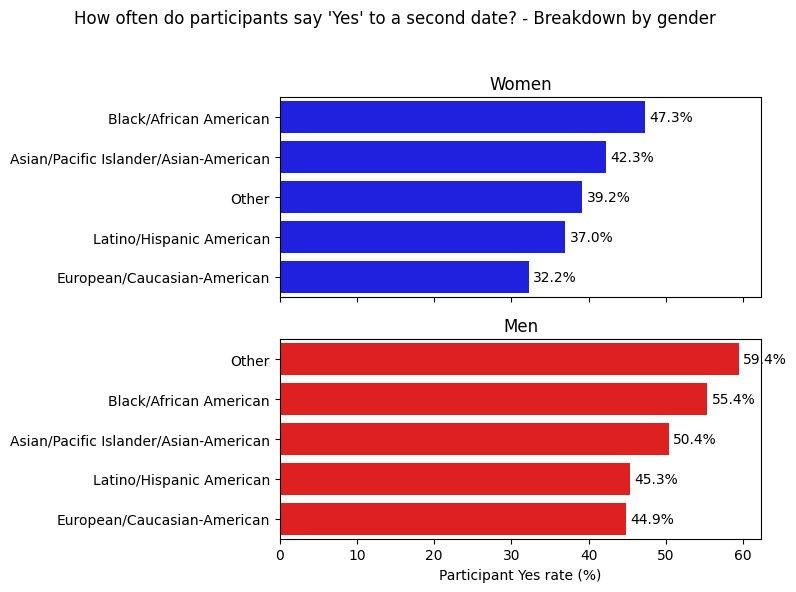

In [105]:
# Sort dataframes by "Participant Yes rate (%)" in descending order
participant_yes_rates_women_df = participant_yes_rates_women_df.sort_values(by="Participant Yes rate (%)", ascending=False)
participant_yes_rates_men_df = participant_yes_rates_men_df.sort_values(by="Participant Yes rate (%)", ascending=False)

# Reduce figure size for better screen fit
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Adjusted size

# Function to add labels to bars
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", padding=3)  # Format as percentage

# Plot for Women
ax1 = sns.barplot(
    data=participant_yes_rates_women_df, 
    x="Participant Yes rate (%)", 
    y="Race", 
    ax=axes[0], 
    color="blue"
)
axes[0].set_title("Women")
axes[0].set_ylabel("")  # Remove y-axis label
add_labels(ax1)  # Add percentage labels

# Plot for Men
ax2 = sns.barplot(
    data=participant_yes_rates_men_df, 
    x="Participant Yes rate (%)", 
    y="Race", 
    ax=axes[1], 
    color="red"
)
axes[1].set_title("Men")
axes[1].set_ylabel("")  # Remove y-axis label
add_labels(ax2)  # Add percentage labels

# Adjust layout for better spacing
plt.suptitle("How often do participants say 'Yes' to a second date? - Breakdown by gender")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensures spacing is well adjusted

# Show plot
plt.show()

Women tend to be around 8% more selective than their male counterparts from the same racial group on average, and consistently said "no" more often than "yes" across all racial groups.

This goes up to a difference of 12% between male and female European/Caucasion-American participants, however - suggesting that the relatively low match rate for women in this group may be more due to participants in this category being more selective about who they want to see for a second date.

There is a 15% gap in Participants' "yes" rates between Black/African American women - the group of women that said "yes" to their partners the most often, with a "yes" rate of 47.3% - and European/Caucasian-American women, who only said "yes" to a second date 32.2% of the time.

A similar, though slightly smaller gap of around 10% exists between the same two racial groups for men. Black/African American (59.4%) and Asian/Pacific Islander/Asian-American men said "yes" more often than not, while European/Caucasian-American and Latino/Hispanic American men were slightly more selective, saying "yes" to a date around 45% of the time.

How does this compare to the Partner Yes rate for the different racial groups?

## 5.3 Partner's "Yes Rate" per racial group

In [106]:
# Calculate Partner Yes Rate (by race)
partner_yes_rate_by_race = df.groupby("race")["dec_o"].mean() * 100

# Convert to dataframe for visualisation
partner_yes_rate_df = partner_yes_rate_by_race.reset_index()

# Rename columns
partner_yes_rate_df.columns = ["Race", "Partner Yes rate (%)"]

C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\4084127243.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\4084127243.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




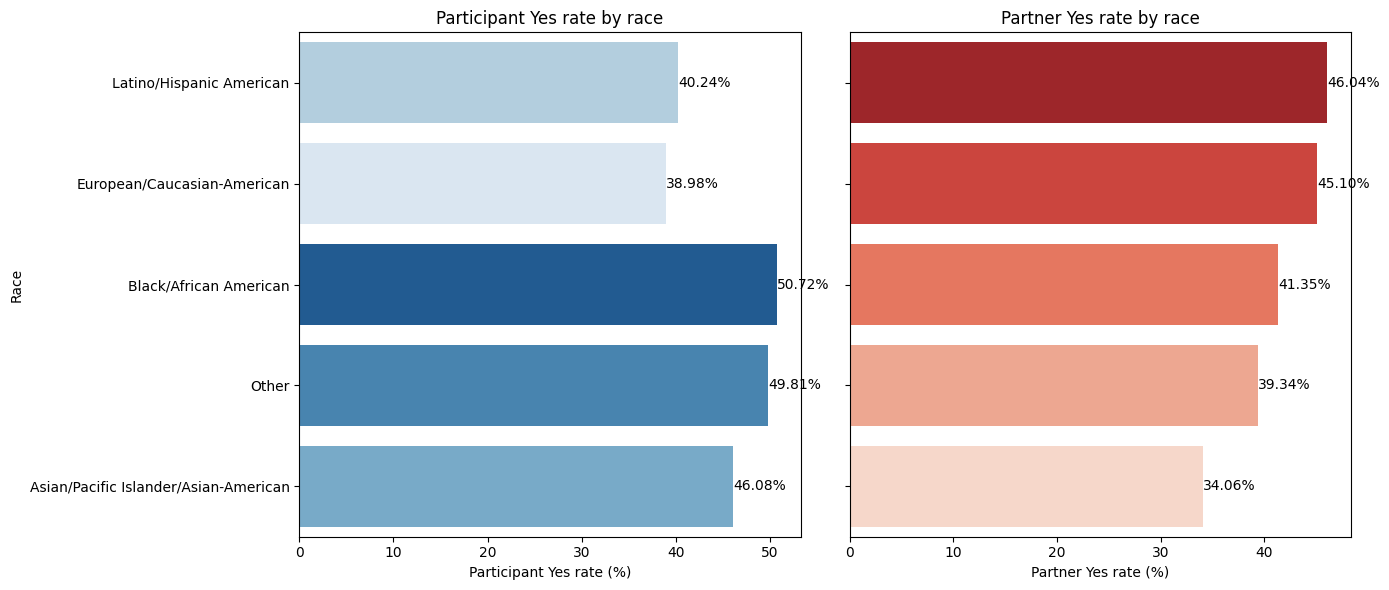

In [107]:
# Sort by Partner Yes rate in descending order
partner_yes_rate_df = partner_yes_rate_df.sort_values(by="Partner Yes rate (%)", ascending=False)

# Reorder Participant Yes rates to match Partner Yes rate order
participant_yes_rate_df = participant_yes_rate_df.set_index("Race").loc[partner_yes_rate_df["Race"]].reset_index()

# Create color palettes based on independent scaling
blues_palette = sns.color_palette("Blues", len(participant_yes_rate_df))
reds_palette = sns.color_palette("Reds", len(partner_yes_rate_df))

# Assign color intensity based on the values in each dataset
blues_shades = [blues_palette[i] for i in np.argsort(participant_yes_rate_df["Participant Yes rate (%)"].values)]
reds_shades = [reds_palette[i] for i in np.argsort(partner_yes_rate_df["Partner Yes rate (%)"].values)]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot Participant Yes rates
sns.barplot(data=participant_yes_rate_df, 
            x="Participant Yes rate (%)", 
            y="Race", 
            ax=axes[0], 
            palette=blues_shades)

axes[0].set_title('Participant Yes rate by race')
axes[0].set_xlabel("Participant Yes rate (%)")
axes[0].set_ylabel("Race")

# Annotate bars with values
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.2f}%', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', 
                     va='center')

# Plot Partner Yes rates
sns.barplot(data=partner_yes_rate_df, 
            x="Partner Yes rate (%)", 
            y="Race", 
            ax=axes[1], 
            palette=reds_shades)

axes[1].set_title("Partner Yes rate by race")
axes[1].set_xlabel("Partner Yes rate (%)")
axes[1].set_ylabel("")

# Annotate bars with values
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.2f}%', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', 
                     va='center')

# Adjust layout
plt.tight_layout()
plt.show()

The two most selective racial groups - Latino/Hispanic American and European/Caucasian-American - also had the highest Partner Yes rates, meaning that partners tended to say "Yes" more often to seeing people of these groups again for a second date.

On the other hand, there's a noticeable ~10-point difference between the Participant Yes rate and the Partner Yes rate for the other three groups, indicating that their interest in others was not reciprocated as often.

To see this more clearly, let's calculate the Reciprocity Gap for each racial group, showing the difference between participants' interest in others and others' interest in them.

## 5.4 Calculating the Reciprocity Gap

As a measure of **perceived desirability vs. expressed interest** and of **reciprocal interest** in a dating context, we will now calculate what we will refer to as the Reprocity Gap for each racial group. This is calculated as follows:

##### Reciprocity Gap = Partner Yes Rate − Participant Yes Rate

**Positive value (+X%)** → The racial group is more desired than they desire others (=*advantage* in dating).</br>
**Negative value (-X%)** → The racial group is choosing partners more often than they are chosen (=*disadvantage* in dating).

Higher values, either positive or negative, indicate an imbalance in reciprocity which could be problematic for the overall dating experience, and which could influence participants' satisfaction with the dating process for the better or the worse.

In [108]:
# --- Calculate the Reciprocity Gap by race ---

# Merge on "Race" to align rows properly
merged_df = pd.merge(
    participant_yes_rate_df, 
    partner_yes_rate_df, 
    on="Race", 
    how="inner", 
    suffixes=("_participant", "_partner")
)

# Calculate Reciprocity Gap = Partner Yes rate - Participant Yes rate
merged_df["Reciprocity Gap (%)"] = (
    merged_df["Partner Yes rate (%)"] 
    - merged_df["Participant Yes rate (%)"]
)

# Sort descending if desired
merged_df = merged_df.sort_values("Reciprocity Gap (%)", ascending=False)

merged_df.head()  # Quick check

,Race,Participant Yes rate (%),Partner Yes rate (%),Reciprocity Gap (%)
1,European/Caucasian-American,38.975787,45.103921,6.128134
0,Latino/Hispanic American,40.243902,46.036585,5.792683
2,Black/African American,50.721154,41.346154,-9.375000
3,Other,49.806202,39.341085,-10.465116
4,Asian/Pacific Islander/Asian-American,46.079430,34.063136,-12.016293


C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\2016965342.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




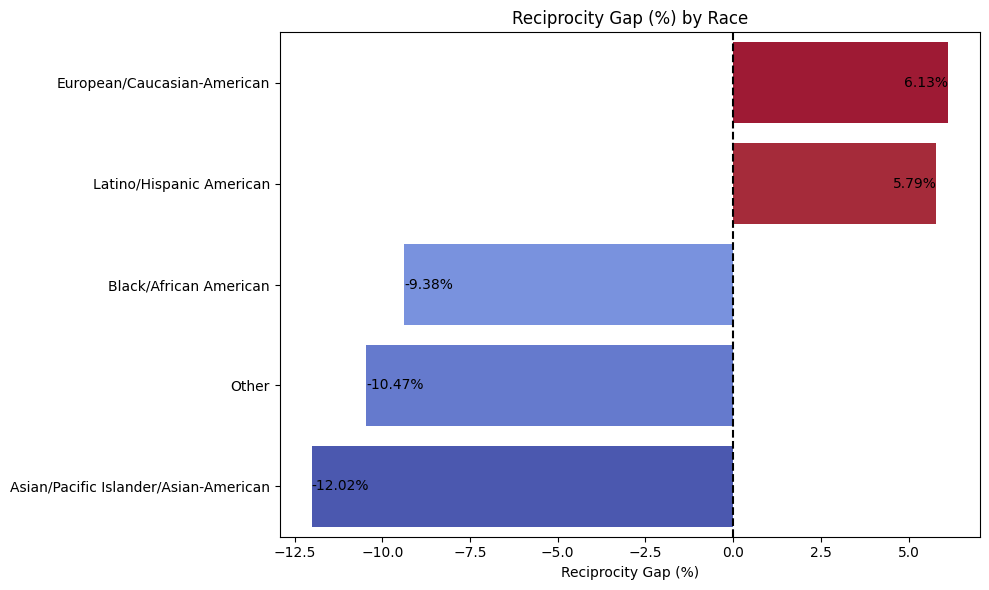

In [109]:
# --- Plot the reciprocity gap by race ---

# 1) Create a diverging colormap and normalizer
cmap = sns.color_palette("coolwarm", as_cmap=True)
norm = plt.Normalize(merged_df["Reciprocity Gap (%)"].min(),
                     merged_df["Reciprocity Gap (%)"].max())

# 2) Generate a list of RGBA colors for each row
colors = [cmap(norm(val)) for val in merged_df["Reciprocity Gap (%)"]]

# 3) Create the barplot, but pass the per-bar colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=merged_df,
            x="Reciprocity Gap (%)",
            y="Race",
            palette=colors,  # per-bar colors
            ax=ax)

ax.set_title("Reciprocity Gap (%) by Race")
ax.set_xlabel("Reciprocity Gap (%)")
ax.set_ylabel("")

# Annotate bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}%',
                (width, p.get_y() + p.get_height()/2),
                ha='left' if width < 0 else 'right',
                va='center')

plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

European/Caucasian-American and Latino/Hispanic American participants had positive reciprocity gaps of around 6%, showing that, overall, people from these categories tended to be desired more often than they desired others - a possible indicator of success in the speed dating experience.

However, considerably large negative reciprocity gaps existed for Black/African American participants (-9.38%) and Asian/Pacific Islander/Asian-American participants (-12.02%), meaning that as a whole, people from these categories tended to chosen for a second date less often than they chose others. This could potentially be a frustrating and disheartening situation for individuals in these categories, and it is an indication of an unequal dating experience for participants across different racial groups.

How does the intersection of race with *gender* affect the reciprocity gap?

In [110]:
# --- Recalculate the different "Yes" rates ---

# Calculate participant yes rate per racial group for women
participant_yes_rates_by_race_women = df[df["gender"] == 0].groupby("race")["dec"].mean() * 100

# Calculate participant yes rate per racial group for men
participant_yes_rates_by_race_men = df[df["gender"] == 1].groupby("race")["dec"].mean() * 100

# Calculate partner yes rate per racial group for women
partner_yes_rates_by_race_women = df[df["gender"] == 0].groupby("race")["dec_o"].mean() * 100

# Calculate partner yes rate per racial group for men
partner_yes_rates_by_race_men = df[df["gender"] == 1].groupby("race")["dec_o"].mean() * 100

# Convert to dataframes for visualisation
participant_yes_rates_women_df = participant_yes_rates_by_race_women.reset_index()
participant_yes_rates_men_df = participant_yes_rates_by_race_men.reset_index()
partner_yes_rates_women_df = partner_yes_rates_by_race_women.reset_index()
partner_yes_rates_men_df = partner_yes_rates_by_race_men.reset_index()

# Rename columns
participant_yes_rates_women_df.columns = ["Race", "Participant Yes rate (%)"]
participant_yes_rates_men_df.columns = ["Race", "Participant Yes rate (%)"]
partner_yes_rates_women_df.columns = ["Race", "Partner Yes rate (%)"]
partner_yes_rates_men_df.columns = ["Race", "Partner Yes rate (%)"]

In [111]:
# --- Merge DataFrames and Calculate Reciprocity Gap ---

# Merge for Women: ensure the DataFrames have columns "Race" and "Participant Yes rate (%)" / "Partner Yes rate (%)"
merged_women = participant_yes_rates_women_df.merge(
    partner_yes_rates_women_df,
    on="Race",
    how="inner",
    suffixes=("_participant", "_partner")
)
merged_women["Reciprocity Gap (%)"] = (
    merged_women["Partner Yes rate (%)"] - merged_women["Participant Yes rate (%)"]
)

# Merge for Men
merged_men = participant_yes_rates_men_df.merge(
    partner_yes_rates_men_df,
    on="Race",
    how="inner",
    suffixes=("_participant", "_partner")
)
merged_men["Reciprocity Gap (%)"] = (
    merged_men["Partner Yes rate (%)"] - merged_men["Participant Yes rate (%)"]
)

# Sort by Reciprocity Gap for clearer ordering
merged_women = merged_women.sort_values("Reciprocity Gap (%)", ascending=False)
merged_men = merged_men.sort_values("Reciprocity Gap (%)", ascending=False)

C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\1140796986.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\1140796986.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




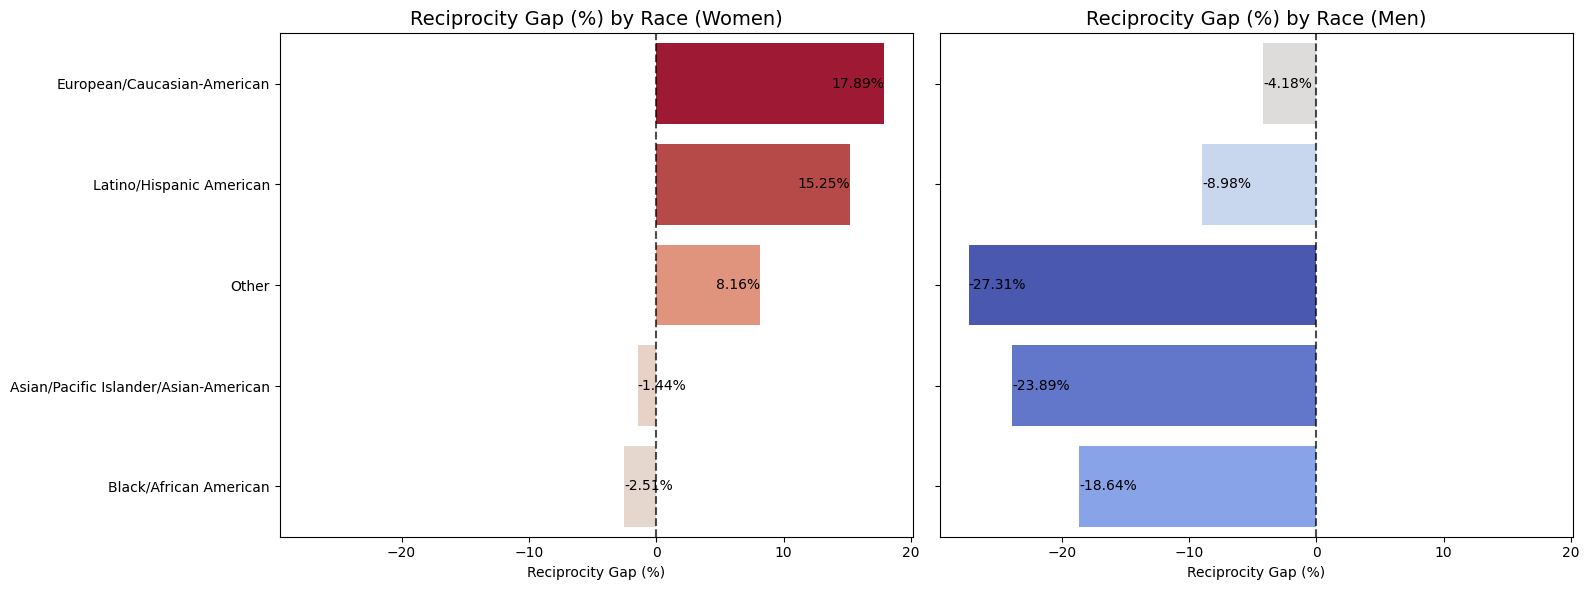

In [112]:
# --- Define a Shared Colormap Based on Numeric Gap ---

# Compute overall min and max across both groups for normalization
overall_min = min(merged_women["Reciprocity Gap (%)"].min(), merged_men["Reciprocity Gap (%)"].min())
overall_max = max(merged_women["Reciprocity Gap (%)"].max(), merged_men["Reciprocity Gap (%)"].max())

norm = plt.Normalize(overall_min, overall_max)
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Generate color arrays based on each numeric gap value
women_colors = [cmap(norm(val)) for val in merged_women["Reciprocity Gap (%)"]]
men_colors   = [cmap(norm(val)) for val in merged_men["Reciprocity Gap (%)"]]

# --- Create Side-by-Side Subplots ---

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True, sharey=True)

# Plot for Women
sns.barplot(
    data=merged_women,
    x="Reciprocity Gap (%)",
    y="Race",
    palette=women_colors,
    ax=axes[0]
)
axes[0].set_title("Reciprocity Gap (%) by Race (Women)", fontsize=14)
axes[0].set_xlabel("Reciprocity Gap (%)")
axes[0].set_ylabel("")
axes[0].axvline(x=0, color="black", linestyle="--", alpha=0.7)

# Annotate bars for Women
for patch in axes[0].patches:
    gap_value = patch.get_width()
    axes[0].annotate(f"{gap_value:.2f}%",
                     (gap_value, patch.get_y() + patch.get_height()/2),
                     ha="left" if gap_value < 0 else "right",
                     va="center")

# Plot for Men
sns.barplot(
    data=merged_men,
    x="Reciprocity Gap (%)",
    y="Race",
    palette=men_colors,
    ax=axes[1]
)
axes[1].set_title("Reciprocity Gap (%) by Race (Men)", fontsize=14)
axes[1].set_xlabel("Reciprocity Gap (%)")
axes[1].set_ylabel("")
axes[1].axvline(x=0, color="black", linestyle="--", alpha=0.7)

# Annotate bars for Men
for patch in axes[1].patches:
    gap_value = patch.get_width()
    axes[1].annotate(f"{gap_value:.2f}%",
                     (gap_value, patch.get_y() + patch.get_height()/2),
                     ha="left" if gap_value < 0 else "right",
                     va="center")

plt.tight_layout()
plt.show()

The overall difference between the genders is that female participants tend to have a positive Reciprocity Gap - meaning that they are desired more often than they desire others (usually considered an advantage in dating), while male participants across all racial groups tended to have a negative Reciprocity Gap on average, meaning that they tended to be chosen less than they chose others (which could be considered as a disadvantage in dating).

However, some rather startling differences across racial groups appear in the data.

Firstly, the trend for positive Reciprocity Gaps only applies for European/Caucasian-American women (17.89%) and Latina/Hispanic American women (15.25%), both categories having a quite considerable advantage in dating on the whole, and women whose race is listed as "Other" (8.16%).

This trend does not hold for Asian/Pacific Islander/Asian-American women (-1.44%) and Black/African American women (-2.51%), who tend to have their interest reciprocated less often. The dating experience may be quite different for women in these categories compared to those mentioned above with high positive Reciprocity Gaps.

For men, a similar trend applies across ethnicities. While all men tend to receive interest from their partner less often than they express it, there is a big gap of almost 10% between the Reciprocity Gaps for European/Caucasian American men (-4.18%) and Latino/Hispanic American men (-8.98%) on the one hand - both categories than tend to have relatively small reciprocity gaps, indicating what is still a fairly balanced dating experience - and all other racial groups.

Out of the groups with clearly defined ethnicities, Asian/Pacific Islander/Asian-American men appeared to have the most imbalanced dating experience, receiving interest from their partners 23.89% *less* than the times they expressed interest in someone. Black/African American men were not far behind, with a -18.64% Reciprocity Gap, indicating a dating experience that was also highly imbalanced on the whole.

Men whose race was listed as "Other" had the lowest Reciprocity Gaps on the whole, with an average gap of -27.31% - a stark contrast with their female counterparts.



### 5.4.1 Hypothesis testing to check statistical significance of differences in Reciprocity Gap between racial groups

Let’s now test whether the Reciprocity Gap - the difference between how often participants say “yes” and how often others say “yes” to them - varies significantly across racial groups.

Since the data is not normally distributed and group variances are not equal, we again use the Kruskal-Wallis tes. This test helps us check whether the average reciprocity gaps differ between racial groups for men and women.

We conduct the test separately for each gender to see if race is a significant factor influencing reciprocity.

#### **Hypotheses:**

**Null Hypothesis (H₀):**</br>
There is no difference in the distribution of reciprocity gap values between racial groups within each gender.

**Alternative Hypothesis (H₁):**</br>
There is a significant difference in the distribution of reciprocity gap values between at least two racial groups within each gender.

If the p-value is below 0.05, we reject H₀ and conclude that race may be associated with differences in reciprocity gaps.

In [113]:
# Extract reciprocity gaps per race group
# Each group must be passed as a separate argument to kruskal()

# For Women
groups_women = [
    group["Reciprocity Gap (%)"].values
    for _, group in merged_women.groupby("Race")
]

# For Men
groups_men = [
    group["Reciprocity Gap (%)"].values
    for _, group in merged_men.groupby("Race")
]

# Kruskal-Wallis Test for Women
stat_women, pval_women = kruskal(*groups_women)

# Kruskal-Wallis Test for Men
stat_men, pval_men = kruskal(*groups_men)

# Print results
print("Kruskal-Wallis Test for Reciprocity Gap by Race (Women):")
print(f"Test statistic = {stat_women:.4f}, p-value = {pval_women:.4f}")
if pval_women < 0.05:
    print("→ There is a significant difference in reciprocity gap between racial groups (women).")
else:
    print("→ No significant difference in reciprocity gap between racial groups (women).")

print("\nKruskal-Wallis Test for Reciprocity Gap by Race (Men):")
print(f"Test statistic = {stat_men:.4f}, p-value = {pval_men:.4f}")
if pval_men < 0.05:
    print("→ There is a significant difference in reciprocity gap between racial groups (men).")
else:
    print("→ No significant difference in reciprocity gap between racial groups (men).")


Kruskal-Wallis Test for Reciprocity Gap by Race (Women):
Test statistic = 4.0000, p-value = 0.4060
→ No significant difference in reciprocity gap between racial groups (women).

Kruskal-Wallis Test for Reciprocity Gap by Race (Men):
Test statistic = 4.0000, p-value = 0.4060
→ No significant difference in reciprocity gap between racial groups (men).


#### **Interpretation of results**
**Women:** Kruskal-Wallis p-value = 0.4060

**Men:** Kruskal-Wallis p-value = 0.4060

Both p-values are well above the 0.05 threshold, so we fail to reject the null hypothesis.

This means we do not have enough statistical evidence to say that the differences in reciprocity gap between racial groups are significant - even if some of the visual differences (such as the gap for Asian men vs. White women) seem large.

These results may be influenced by small sample sizes and high variability within groups, which reduce the test’s ability to detect significant differences.

## 5.5 Exploring Optimism and Satisfaction scores by race and gender

In product analytics, at this stage, we might wish to see whether there is a correlation between each race group's average churn rate (and/or retention rate) and their Reciprocity Gap or Match Rate. If a correlation were to be found, this would help us to establish a business case for balancing disparities in match rates between race-gender groups.

Since this is data from a real-life speed dating event, we don't have access to product data for direct business-level metrics typically used to assess user engagement and monetisation, such as churn rate, retention rate, or conversion rate. However, we do have psychometric data on measures like participants' satisfaction with the speed dating experience, which, in the context of an app, might correlate with these business metrics. We will use these psychometric scores as a proxy for the kinds of business metrics we would typically analyse when looking at user behavior on an app.

To measure how well the speed dating process corresponded to participants' hopes and expectations, we will calculate **optimism** scores prior to the dating event (based on the `exphappy` column).

We will then compare users' levels of optimism going into the speed dating event to their **satisfaction** scores at the end of the process, to see whether they were satisfied or disappointed with their dating experience.

We will be looking to establish whether or not the trends observed above for average match rate and Reciprocity Gap by race and gender are mirrored in satisfaction scores.

### 5.5.6 Optimism scores

Let's start by looking at participants' levels of optimism before participating in the speed dating event (`exphappy`).

In [114]:
# Calculate average optimism scores by race
participant_optimism_scores_by_race = df.groupby("race")["exphappy"].mean()
participant_optimism_scores_by_race_women = df[df["gender"] == 0].groupby("race")["exphappy"].mean()
participant_optimism_scores_by_race_men = df[df["gender"] == 1].groupby("race")["exphappy"].mean()

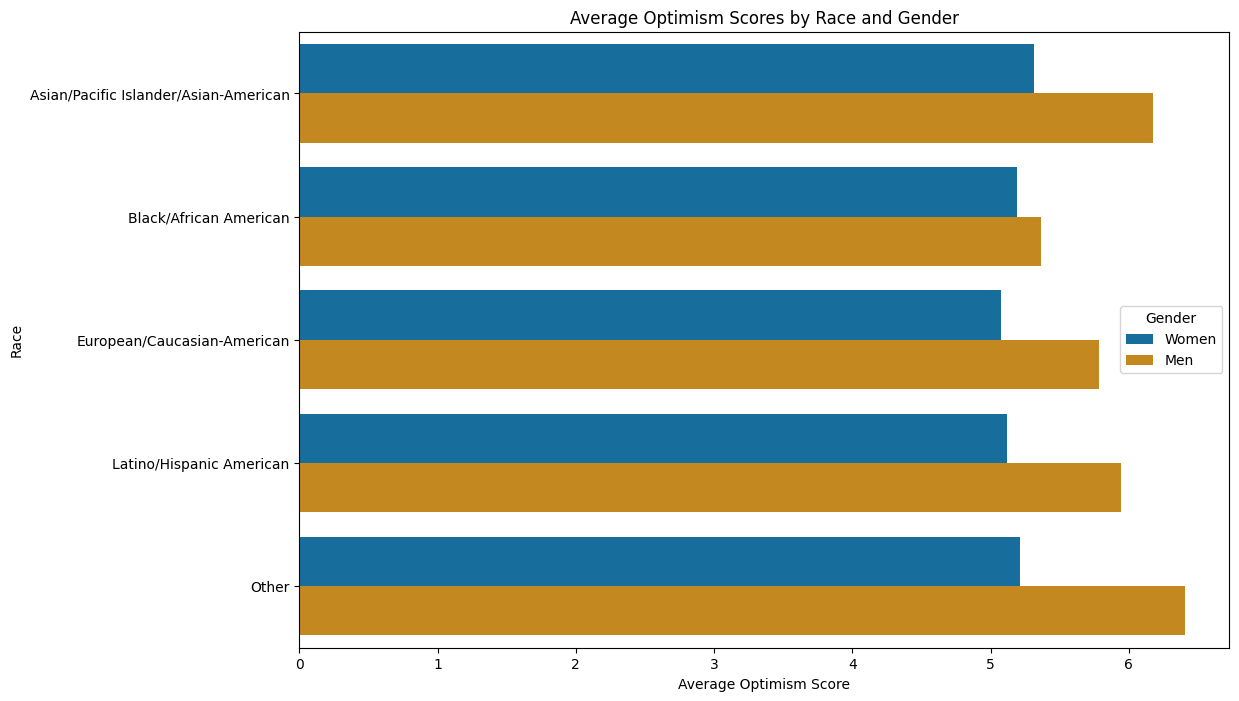

In [115]:
# Combine the optimism scores into a single DataFrame for easier plotting
optimism_scores_df = pd.DataFrame({
    "Race": participant_optimism_scores_by_race.index,
    "Women": participant_optimism_scores_by_race_women.values,
    "Men": participant_optimism_scores_by_race_men.values
})

# Melt the DataFrame to long format for seaborn
optimism_scores_melted = optimism_scores_df.melt(id_vars="Race", var_name="Gender", value_name="Average Optimism Score")

# Plot the average optimism scores by race for men and women
plt.figure(figsize=(12, 8))
sns.barplot(data=optimism_scores_melted, x="Average Optimism Score", y="Race", hue="Gender", palette="colorblind")
plt.title("Average Optimism Scores by Race and Gender")
plt.xlabel("Average Optimism Score")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()

We can see that men generally tend to be more optimistic about the dating process than women.

Among men, Asian/Pacific Islander/Asian-American participants (and men whose race is listed as "Other") tend to be the most optimistic about the speed dating process. Does this group of men's actual experience of the dating process - observed above in their comparatively low match rates and Reciprocity Gaps - have an impact on their satisfaction scores after the event?

Black/African American men, meanwhile, reported comparatively low levels of optimism compared to other groups. While this group shows a low Reciprocity Gap, they had one of the highest match rates among all groups. Do their comparative overall levels of success in the dating event have an impact on their satisfaction scores?

### 5.5.6 Satisfaction scores

Let's now look at participants' levels of satisfaction with the speed dating process after the event (`satis_2`).

Do participants' match rates or Reciprocity Gaps influence their levels of satisfaction with the speed dating process?

In [116]:
# Calculate average satisfaction scores by race
participant_satisfaction_scores_by_race = df.groupby("race")["satis_2"].mean()
participant_satisfaction_scores_by_race_women = df[df["gender"] == 0].groupby("race")["satis_2"].mean()
participant_satisfaction_scores_by_race_men = df[df["gender"] == 1].groupby("race")["satis_2"].mean()

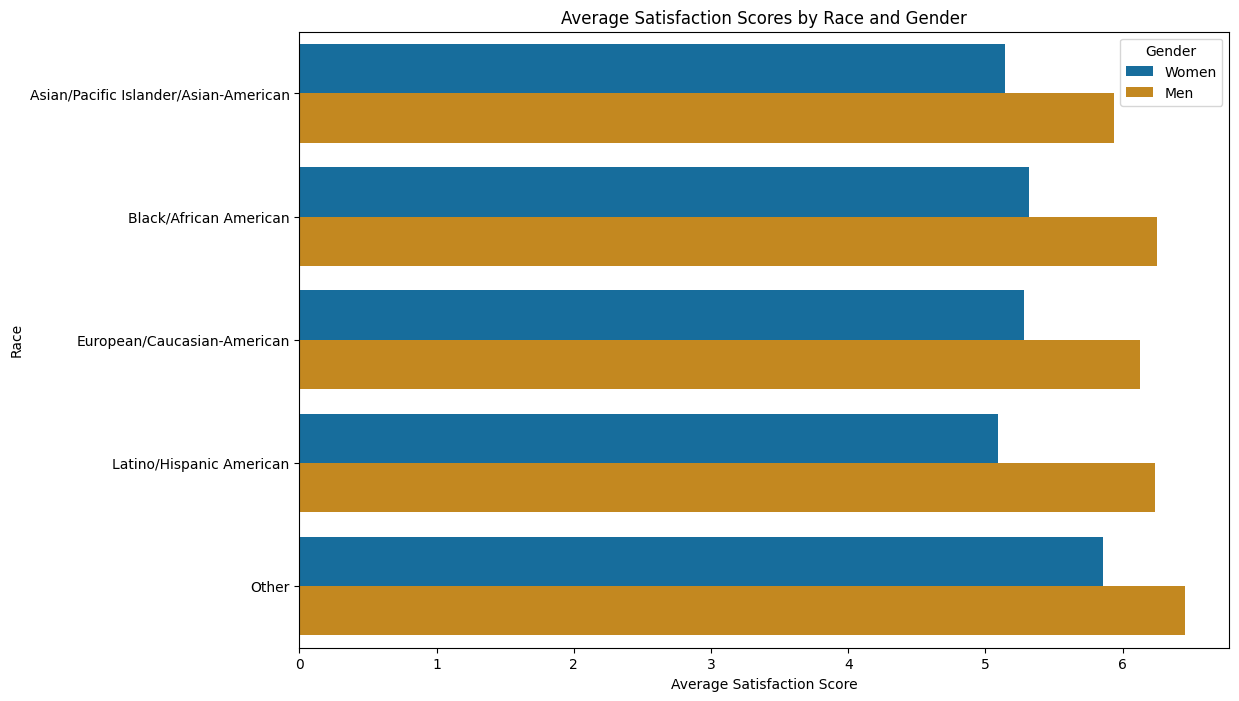

In [117]:

# Calculate average satisfaction scores by race
participant_satisfaction_scores_by_race = df.groupby("race")["satis_2"].mean()
participant_satisfaction_scores_by_race_women = df[df["gender"] == 0].groupby("race")["satis_2"].mean()
participant_satisfaction_scores_by_race_men = df[df["gender"] == 1].groupby("race")["satis_2"].mean()

# Combine the satisfaction scores into a single DataFrame for easier plotting
satisfaction_scores_df = pd.DataFrame({
    "Race": participant_satisfaction_scores_by_race.index,
    "Women": participant_satisfaction_scores_by_race_women.values,
    "Men": participant_satisfaction_scores_by_race_men.values
})

# Melt the DataFrame to long format for seaborn
satisfaction_scores_melted = satisfaction_scores_df.melt(
    id_vars="Race", 
    var_name="Gender", 
    value_name="Average Satisfaction Score"
)

# Plot the average satisfaction scores by race for men and women
plt.figure(figsize=(12, 8))
sns.barplot(data=satisfaction_scores_melted, 
            x="Average Satisfaction Score", 
            y="Race", 
            hue="Gender", 
            palette="colorblind")
plt.title("Average Satisfaction Scores by Race and Gender")
plt.xlabel("Average Satisfaction Score")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()


The shape looks a little different here. It seems that some groups' satisfaction scores are higher than their pre-event optimism scores, while the inverse is true for other groups.

To see these trends more clearly, we're going to calculate and visualise the difference between Satisfaction scores and Optimism scores for each group of race and gender.

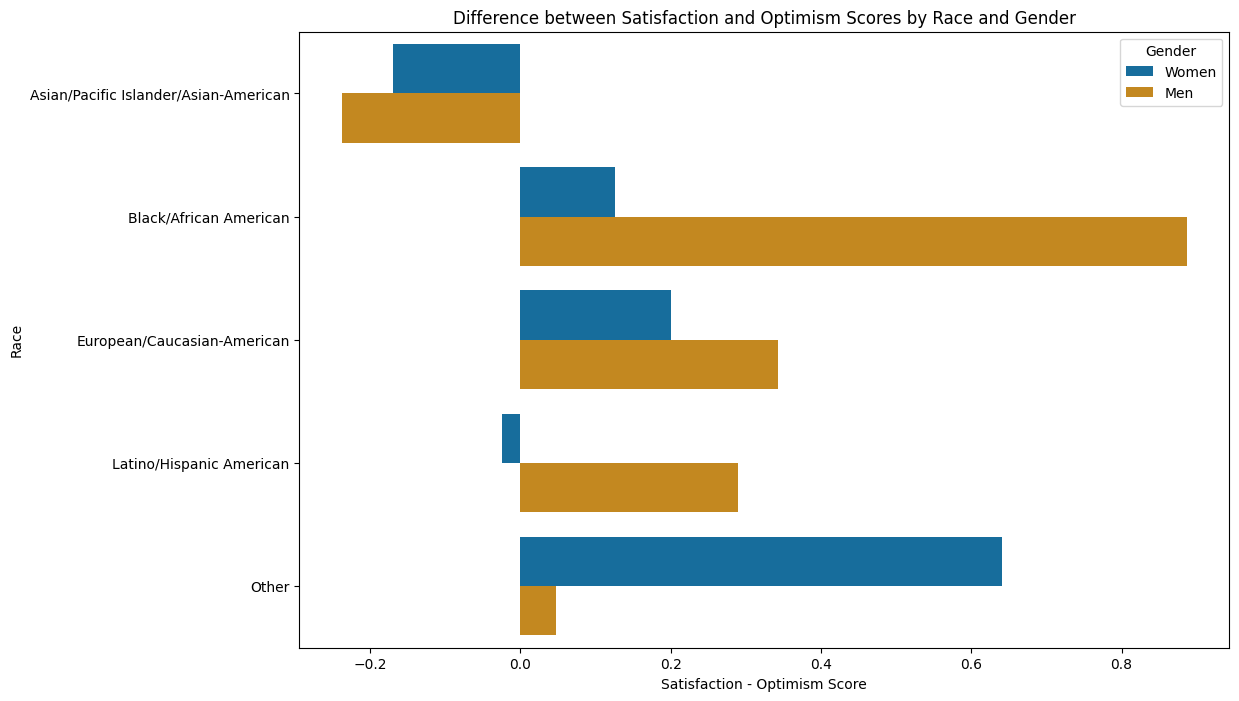

In [118]:
# Calculate the difference between Satisfaction score and Optimism score by race for men and women
satisfaction_optimism_diff_women = participant_satisfaction_scores_by_race_women - participant_optimism_scores_by_race_women
satisfaction_optimism_diff_men = participant_satisfaction_scores_by_race_men - participant_optimism_scores_by_race_men

# Convert the differences into a DataFrame
satisfaction_optimism_diff_df = pd.DataFrame({
    "Race": satisfaction_optimism_diff_women.index,  # Get race categories
    "Women": satisfaction_optimism_diff_women.values,
    "Men": satisfaction_optimism_diff_men.values
})

# Melt the DataFrame for visualisation
satisfaction_optimism_diff_melted = satisfaction_optimism_diff_df.melt(
    id_vars="Race", var_name="Gender", value_name="Satisfaction - Optimism Score"
)

# Plot the differences
plt.figure(figsize=(12, 8))
sns.barplot(data=satisfaction_optimism_diff_melted, x="Satisfaction - Optimism Score", y="Race", hue="Gender", palette="colorblind")
plt.title("Difference between Satisfaction and Optimism Scores by Race and Gender")
plt.xlabel("Satisfaction - Optimism Score")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()

Now the trends are easier to notice.

Most groups reported a higher level of satisfaction with the dating process compared to their levels of pre-event optimism. This is particularly noticeable for Black/African-American men and women whose gender is listed as "Other", whose satisfaction levels tended to increase noticeably compared to initial expectations: both these groups had some of the highest average match rates among racial groups of their gender, which could be an explaining factor.

However, some interesting exceptions become visible here, indicating that not all groups of participants have a positive dating experience.

Firstly, Asian/Pacific Islander/Asian-American participants - both men and women - tend to experience a decrease in satisfaction compared to their initial optimism. This may be related to their comparatively low match rates and Reciprocity Gaps.

Secondly, Latina/Hispanic American women tend to demonstrate a slight decrease in satisfaction with the dating process compared to their relatively cautious initial levels of optimism with the process. This is not easily explained by this group's match rates or Reciprocity Gaps, which were both comparatively high on average and usually would have indicated relative success in dating. Something else may be going on that may help to explain this group's relative dissatisfaction with the speed dating process.

Let's visualise the distribution of satisfaction scores for different race-gender groups to have a better idea of what's going on here.

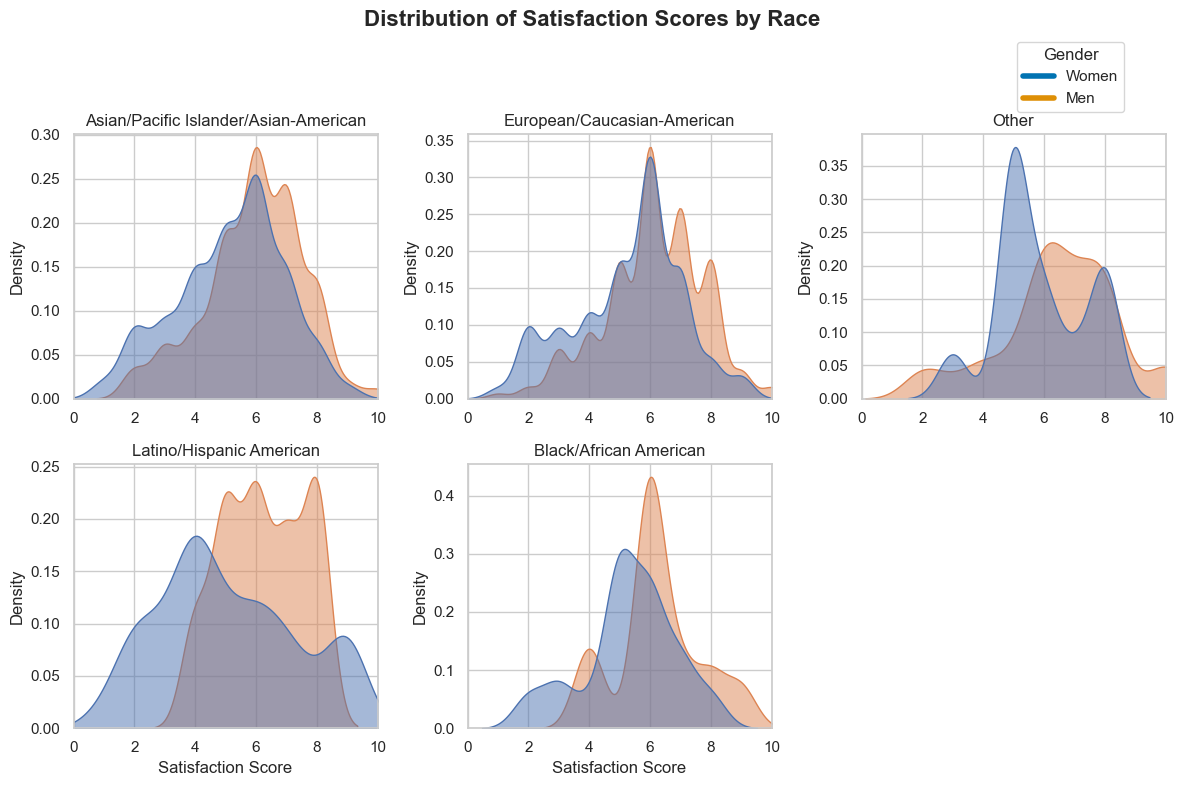

In [119]:
sns.set(style="whitegrid")

races = df["race"].unique()
num_races = len(races)

num_cols = 3
num_rows = math.ceil(num_races / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows), sharex=True)
axes = axes.flatten()

# Plot KDE for each race with x-axis limits from 0 to 10.
for i, race in enumerate(races):
    ax = axes[i]
    sns.kdeplot(
        data=df[df["race"] == race],
        x="satis_2",
        hue="gender",
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=ax,
        legend=False   # disable individual legends
    )
    ax.set_title(f"{race}")
    ax.set_xlabel("Satisfaction Score")
    ax.set_ylabel("Density")
    ax.set_xlim(0, 10)
    ax.tick_params(axis="x", labelbottom=True)

# Remove any unused axes if total plots < num_cols * num_rows
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Create a common legend using custom Line2D elements.
# Using seaborn's default palette; adjust if necessary.
palette = sns.color_palette("colorblind")  
legend_elements = [
    Line2D([0], [0], color=palette[0], lw=4, label='Women'),
    Line2D([0], [0], color=palette[1], lw=4, label='Men')
]
fig.legend(handles=legend_elements, title="Gender", loc="upper right", bbox_to_anchor=(0.95, 0.95))

# Set overall title and adjust layout to make room for the legend and title
fig.suptitle("Distribution of Satisfaction Scores by Race", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


As seen above, women tend to report lower levels of satisfaction than their male counterparts from the same racial group.

The most common trend is for a slightly left-tailed distribution, showing moderately positive levels of satisfaction for most groups.

However, we can see a few exceptions to this:

- Women whose race was listed as "Other" tended to be noticeably less satisfied than their male counterparts, with the peak of the distribution very much focusing around a middling 5 (although there is a smaller second peak around 8, indicating that a certain number of people in this group felt very satisfied overall with their experience).

- Black/African American women were less satisfied than their male counterparts, with the peak of the distribution at a neutral 5, and with a larger number of people in the left tail of the distribution, indicating dissatisfaction with the process.

- The most noticeable difference between the genders is seen in the Latino/Hispanic American category: men in this category experiecned high to very high levels of satisfaction overall, while the pattern for Latina/Hispanic American women follows a **right-tailed** distribution, bucking the overall trend. The peak of Latina/Hispanic American women's distribution of satisfaction levels is a dissatisfied 4, with a number of others scoring a 3 or even a 2. What is behind this dissatisfaction?

Is this dissatisfaction for certain categories, such as Latina/Hispanic American women, linked in some way to how others treat them because of their race or gender? The fact that the distributions of other groups looks very different appears so, but there may be other variables at play. While we may not be able to establish a conclusive answer to this question in this study, we do have one possible avenue of investigation here.

Before we do so, let's check if our results are statistically significant.

#### **5.5.6.1 Hypothesis testing to check if satisfaction scores differ significantly by race**

Let's now run a hypothesis test to check whether the differences we observed in satisfaction scores between racial groups are statistically significant.

Since the distributions are not normal and the variance across groups is not equal (as seen in the KDE plots), we use the Kruskal-Wallis test, a non-parametric alternative to ANOVA. This test is suitable when:

- You're comparing more than two groups,

- The data is ordinal or not normally distributed, and

- You want to check if at least one group differs significantly from the others.

We run the test separately for men and women to see if race affects satisfaction scores within each gender group.

##### **Hypotheses:**
**Null Hypothesis (H₀):**</br>
There is no significant difference in the distribution of satisfaction scores across racial groups (within each gender).

**Alternative Hypothesis (H₁):**</br>
At least one racial group has a significantly different distribution of satisfaction scores (within each gender).

In [120]:
# Prepare satisfaction scores grouped by race for each gender
satisfaction_scores_women = [
    df[(df["gender"] == 0) & (df["race"] == race)]["satis_2"].dropna()
    for race in df["race"].unique()
]

satisfaction_scores_men = [
    df[(df["gender"] == 1) & (df["race"] == race)]["satis_2"].dropna()
    for race in df["race"].unique()
]

# Run Kruskal-Wallis test
stat_women, p_women = kruskal(*satisfaction_scores_women)
stat_men, p_men = kruskal(*satisfaction_scores_men)

print("Kruskal-Wallis Test for Satisfaction Scores by Race (Women):")
print(f"Test statistic = {stat_women:.4f}, p-value = {p_women:.4f}")
if p_women < 0.05:
    print("→ Significant difference in satisfaction scores between racial groups (women).")
else:
    print("→ No significant difference in satisfaction scores between racial groups (women).")

print("\nKruskal-Wallis Test for Satisfaction Scores by Race (Men):")
print(f"Test statistic = {stat_men:.4f}, p-value = {p_men:.4f}")
if p_men < 0.05:
    print("→ Significant difference in satisfaction scores between racial groups (men).")
else:
    print("→ No significant difference in satisfaction scores between racial groups (men).")

Kruskal-Wallis Test for Satisfaction Scores by Race (Women):
Test statistic = 30.2633, p-value = 0.0000
→ Significant difference in satisfaction scores between racial groups (women).

Kruskal-Wallis Test for Satisfaction Scores by Race (Men):
Test statistic = 25.8136, p-value = 0.0000
→ Significant difference in satisfaction scores between racial groups (men).


#### **Interpretation of results**

The Kruskal-Wallis test returned a p-value of 0.0000 for both women and men. Since this is well below the 0.05 threshold, we can confidently reject the null hypothesis for each gender.

This indicates that the differences in satisfaction scores between racial groups are statistically significant. In other words, it's highly unlikely that these differences are due to random variation.

Put simply, race appears to influence satisfaction levels in the speed dating experience, for both women and men. These findings suggest that participants’ sense of enjoyment or fulfilment from the event may be shaped, at least in part, by racial dynamics.

## 5.5 Levels of interest ("Yes rates") expressed in different racial groups

It has been documented elsewhere (https://www.npr.org/sections/codeswitch/2013/11/30/247530095/are-you-interested-dating-odds-favor-white-men-asian-women) that when people experience racism on a dating app, it tends to fall into one of two broad categories: rejection because of one's race on the one hand, or objectification due to one's race (as a result of cultural and/or racial stereotyping) on the other. Aforementioned investigations into Match Rates and the Reciprocity Gap suggest that the latter is not at play here for Latina/Hispanic American women participating in this study. Below, we will look at levels of interest shown by the different racial groups in other racial groups to see whether the latter can be inferred here.

First, let's look at levels of interest expressed by women in different groups of men.

In [121]:
# Filter for women only 
female_participants = df[df["gender"] == 0]

# Filter for only "yes" decisions
female_participants_yes_responses = female_participants[female_participants["dec"] == 1]

# Count total "yes" responses per participant's race (for women)
total_yes_responses_by_race_women = female_participants_yes_responses.groupby("race")["dec"].count()

# Count the number of "yes" responses for each partner's race within each participant race group (for women)
yes_responses_by_participant_and_partner_race_women = female_participants_yes_responses.groupby(["race", "race_o"])["dec"].count()

# Calculate the raw percentage of yes responses within each participant race group
yes_responses_percentage_women = (yes_responses_by_participant_and_partner_race_women / total_yes_responses_by_race_women) * 100

# Convert to DataFrame for readability
yes_responses_percentage_women_df = yes_responses_percentage_women.reset_index()
yes_responses_percentage_women_df.columns = ["Participant's Race", "Partner's Race (race_o)", "Percentage of Yes Responses (%)"]

# Function to rank partner races within each participant race group
def get_rankings(group):
    # Sort the group in descending order (highest percentage first)
    group_sorted = group.sort_values("Percentage of Yes Responses (%)", ascending=False)
    # Define the rank labels
    rank_labels = ["Max Interest", "Second Highest", "Third Highest", "Fourth Highest", "Min Interest"]
    result = {}
    # Loop over expected five ranks; if there are fewer than five rows, fill with NaN
    for i, label in enumerate(rank_labels):
        if i < len(group_sorted):
            row = group_sorted.iloc[i]
            result[f"Partner's Race ({label})"] = row["Partner's Race (race_o)"]
            result[f"Percentage of Yes Responses (%) ({label})"] = row["Percentage of Yes Responses (%)"]
        else:
            result[f"Partner's Race ({label})"] = None
            result[f"Percentage of Yes Responses (%) ({label})"] = float('nan')
    return pd.Series(result)

# Apply the ranking function per participant race group
ranked_results_women = yes_responses_percentage_women_df.groupby("Participant's Race").apply(get_rankings).reset_index()

# Display the final results
display(ranked_results_women)


C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\2819062562.py:39: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Participant's Race,Partner's Race (Max Interest),Percentage of Yes Responses (%) (Max Interest),Partner's Race (Second Highest),Percentage of Yes Responses (%) (Second Highest),Partner's Race (Third Highest),Percentage of Yes Responses (%) (Third Highest),Partner's Race (Fourth Highest),Percentage of Yes Responses (%) (Fourth Highest),Partner's Race (Min Interest),Percentage of Yes Responses (%) (Min Interest)
0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,61.503417,Asian/Pacific Islander/Asian-American,22.551253,Other,6.378132,Latino/Hispanic American,5.239180,Black/African American,4.328018
1,Black/African American,European/Caucasian-American,60.176991,Asian/Pacific Islander/Asian-American,17.699115,Latino/Hispanic American,8.849558,Black/African American,7.079646,Other,6.194690
2,European/Caucasian-American,European/Caucasian-American,74.110953,Asian/Pacific Islander/Asian-American,12.233286,Latino/Hispanic American,5.263158,Other,4.694168,Black/African American,3.698435
3,Latino/Hispanic American,European/Caucasian-American,61.486486,Asian/Pacific Islander/Asian-American,16.891892,Latino/Hispanic American,8.783784,Other,7.432432,Black/African American,5.405405
4,Other,European/Caucasian-American,61.458333,Asian/Pacific Islander/Asian-American,15.625000,Latino/Hispanic American,10.416667,Other,8.333333,Black/African American,4.166667


We can see immediately that the imbalanced levels of representation of different racial groups in the dataset (with the predominance of European/Caucasian-American participants, who make up 55% of all participants in the dataset) makes it hard to read the results. However, we can take the distribution of participants in the dataset by race as a benchmark to see if interest levels are proportionate:

Male Race Distribution:</br>
European/Caucasian-American               59%</br>
Asian/Pacific Islander/Asian-American               24%</br>
Other                8%</br>
Latino/Hispanic American                6%</br>
Black/African American                4%

Levels of interest tend to hover fairly closely around the actual levels of representation in the dataset for most categories, with some exceptions.

European/Caucasian-American women tend to show more interest in dating men of the same race as them (making up 74% of their "yes" decisions, compared to 59% European/Caucasian-American men in the dataset).

Asian men tended to get disproportionately low levels of interest from most racial groups, with a slight exception from women of the same race (22% of interest shown, compared to 24% of men in the dataset being Asian/Pacific Islander/Asian-American). This gap between representation and actual levels of interest was particularly notable coming from European/Caucasian-American women, who only gave 12% of their "yes" decisions to men of this category.

In [122]:
# Filter for men only 
male_participants = df[df["gender"] == 1]

# Filter for only "yes" decisions
male_participants_yes_responses = male_participants[male_participants["dec"] == 1]

# Count total "yes" responses per participant's race (for men)
total_yes_responses_by_race_men = male_participants_yes_responses.groupby("race")["dec"].count()

# Count the number of "yes" responses for each partner's race within each participant race group (for men)
yes_responses_by_participant_and_partner_race_men = male_participants_yes_responses.groupby(["race", "race_o"])["dec"].count()

# Calculate the raw percentage of yes responses within each participant race group
yes_responses_percentage_men = (yes_responses_by_participant_and_partner_race_men / total_yes_responses_by_race_men) * 100

# Convert to DataFrame for readability
yes_responses_percentage_men_df = yes_responses_percentage_men.reset_index()
yes_responses_percentage_men_df.columns = ["Participant's Race", "Partner's Race (race_o)", "Percentage of Yes Responses (%)"]

# Rank partner races for each participant race group

def get_rankings(group):
    # Sort the group in descending order (highest % first)
    group_sorted = group.sort_values("Percentage of Yes Responses (%)", ascending=False)
    # Define the five rank labels.
    rank_labels = ["Max Interest", "Second Highest", "Third Highest", "Fourth Highest", "Min Interest"]
    result = {}
    # Loop through the five positions. If group has fewer than 5 rows, fill with None/NaN.
    for i, label in enumerate(rank_labels):
        if i < len(group_sorted):
            row = group_sorted.iloc[i]
            result[f"Partner's Race ({label})"] = row["Partner's Race (race_o)"]
            result[f"Percentage of Yes Responses (%) ({label})"] = row["Percentage of Yes Responses (%)"]
        else:
            result[f"Partner's Race ({label})"] = None
            result[f"Percentage of Yes Responses (%) ({label})"] = float('nan')
    return pd.Series(result)

# Apply the ranking function per participant race group.
ranked_results = yes_responses_percentage_men_df.groupby("Participant's Race").apply(get_rankings).reset_index()

# Display the final merged results
display(ranked_results)

C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\1719118066.py:40: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Participant's Race,Partner's Race (Max Interest),Percentage of Yes Responses (%) (Max Interest),Partner's Race (Second Highest),Percentage of Yes Responses (%) (Second Highest),Partner's Race (Third Highest),Percentage of Yes Responses (%) (Third Highest),Partner's Race (Fourth Highest),Percentage of Yes Responses (%) (Fourth Highest),Partner's Race (Min Interest),Percentage of Yes Responses (%) (Min Interest)
0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,54.506438,Asian/Pacific Islander/Asian-American,23.819742,Latino/Hispanic American,10.085837,Other,6.008584,Black/African American,5.579399
1,Black/African American,European/Caucasian-American,57.142857,Asian/Pacific Islander/Asian-American,19.387755,Latino/Hispanic American,12.244898,Black/African American,6.122449,Other,5.102041
2,European/Caucasian-American,European/Caucasian-American,57.974910,Asian/Pacific Islander/Asian-American,20.788530,Latino/Hispanic American,10.394265,Other,5.465950,Black/African American,5.376344
3,Latino/Hispanic American,European/Caucasian-American,58.620690,Asian/Pacific Islander/Asian-American,16.379310,Latino/Hispanic American,10.344828,Other,9.482759,Black/African American,5.172414
4,Other,European/Caucasian-American,47.204969,Asian/Pacific Islander/Asian-American,26.708075,Latino/Hispanic American,13.664596,Other,6.832298,Black/African American,5.590062


Female Race Distribution:</br>
European/Caucasian-American                 52%</br>
Asian/Pacific Islander/Asian-American                 26%</br>
Latino/Hispanic American                  9%</br>
Other                  6%</br>
Black/African American                  6%

Here levels of interest tend to hover even closer to actual representation within the dataset. As always, there are some slight exceptions.

Latino/Hispanic American men tend to show disproportionately lower levels of interest in Asian/Pacific Islander/Asian-American women, with a 10-point difference between interest levels and actual representation.

Levels of interest in Latina/Hispanic American women are consistently slightly higher than this group of women's actual representation within the dataset, by a 1-4% difference. While this may possibly indicate a slight racial preference shown by men towards women of this category, potentially due to cultural and/or racial stereotypes, we cannot conclude this definitively from the findings, and other factors may be at play behind this difference in levels of interest or behind this group of women's lower levels of satisfaction with the dating process. While a sense of being objectified due to one's race would potentially help to explain lower levels of satisfaction, further qualitative research - including interviews with women of this group - would be needed in order to establish such conclusions. While this is a potentially interesting direction for further study, it is beyond the scope of this analysis.

## 5.6 Exploring participants' confidence levels pre- and post-event

During our earlier exploration, we established that there was a very slight increase in participants' overall levels of self-confidence. This was measured by comparing the following columns:

`attr3_1`: How attractive participants thought they were *before* the event</br>
`attr3_2`: How attractive participants thought they were *after* the event

Few conclusions could be drawn from this alone, but are there variations in levels of pre- and post-event confidence levels according to race?

First, we will look at average confidence levels by race and gender.

In [123]:
# Calculate average pre-event confidence levels by race
pre_event_confidence_levels_by_race = df.groupby("race")["attr3_1"].mean()
pre_event_confidence_levels_by_race_women = df[df["gender"] == 0].groupby("race")["attr3_1"].mean()
pre_event_confidence_levels_by_race_men = df[df["gender"] == 1].groupby("race")["attr3_1"].mean()

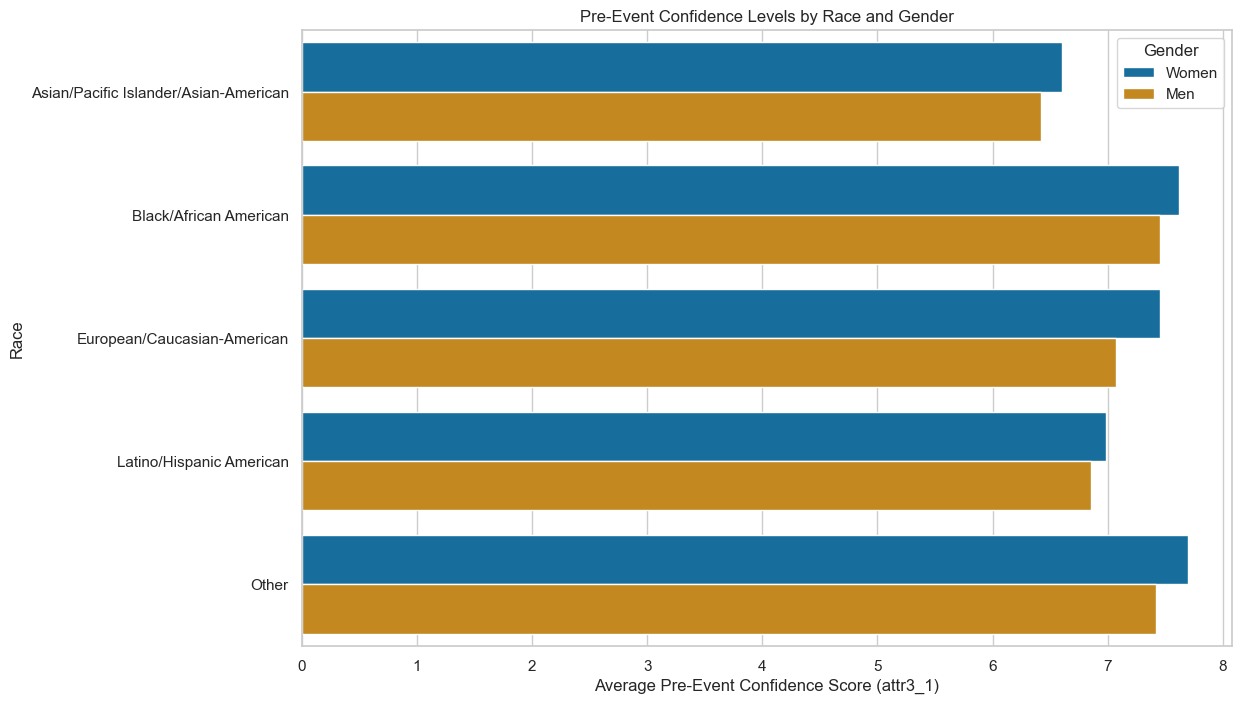

In [124]:
# Combine pre-event confidence scores into a single DataFrame for easier plotting
pre_event_confidence_scores_df = pd.DataFrame({
    "Race": pre_event_confidence_levels_by_race.index,
    "Women": pre_event_confidence_levels_by_race_women.values,
    "Men": pre_event_confidence_levels_by_race_men.values
})

# Melt the DataFrame to long format for seaborn
pre_event_confidence_scores_melted = pre_event_confidence_scores_df.melt(id_vars="Race", var_name="Gender", value_name="Average Confidence Score")

# Plot the average optimism scores by race for men and women
plt.figure(figsize=(12, 8))
sns.barplot(data=pre_event_confidence_scores_melted, x="Average Confidence Score", y="Race", hue="Gender", palette="colorblind")
plt.title("Pre-Event Confidence Levels by Race and Gender")
plt.xlabel("Average Pre-Event Confidence Score (attr3_1)")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()

Men tended to display very slightly lower levels of confidence than their female counterparts, but otherwise men and women's pre-event confidence level within the same race aligned fairly closely on average.

Black/African American participants and participants whose race was listed as "Other" displayed the highest self-evaluated attractiveness scores prior to the event, indicating high levels of confidence on average, while Asian/Pacific Islander/Asian-American participants reported the lowest levels of confidence pre-event.

How did these scores evolve after participation in the event?

In [125]:
# Calculate average post-event confidence levels by race
post_event_confidence_levels_by_race = df.groupby("race")["attr3_2"].mean()
post_event_confidence_levels_by_race_women = df[df["gender"] == 0].groupby("race")["attr3_2"].mean()
post_event_confidence_levels_by_race_men = df[df["gender"] == 1].groupby("race")["attr3_2"].mean()

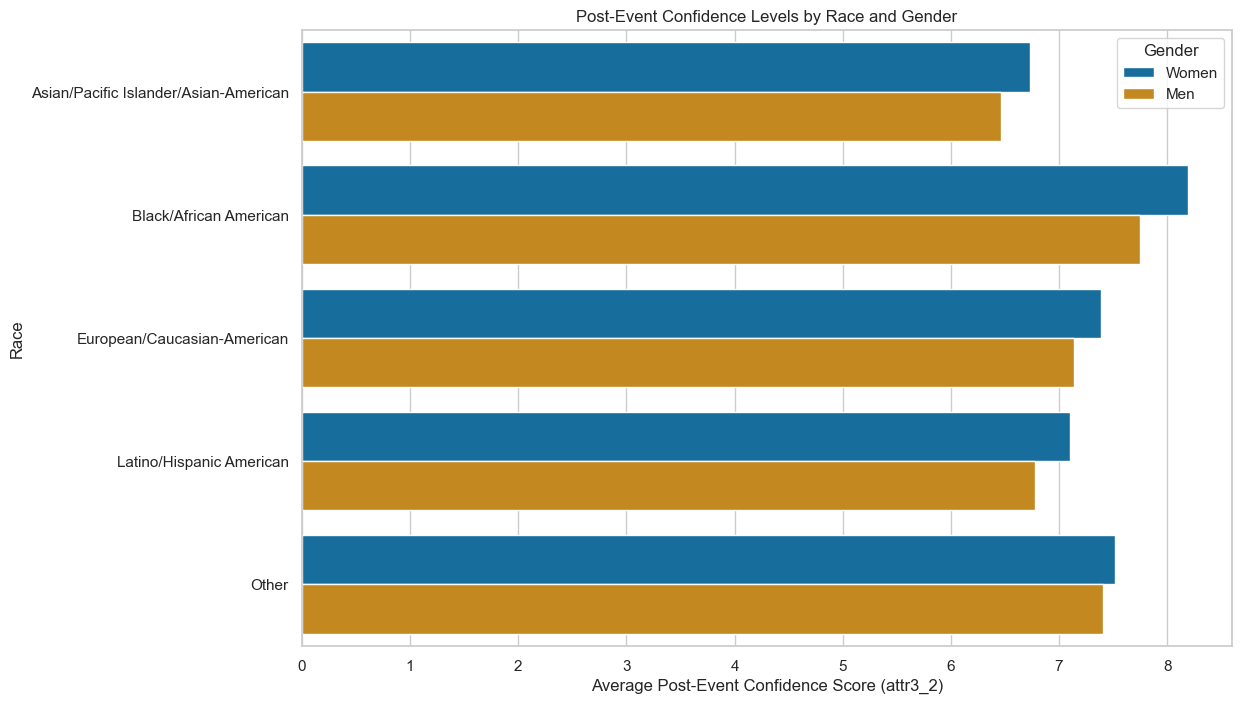

In [126]:
# Combine post-event confidence scores into a single DataFrame for easier plotting
post_event_confidence_scores_df = pd.DataFrame({
    "Race": post_event_confidence_levels_by_race.index,
    "Women": post_event_confidence_levels_by_race_women.values,
    "Men": post_event_confidence_levels_by_race_men.values
})

# Melt the DataFrame to long format for seaborn
post_event_confidence_scores_melted = post_event_confidence_scores_df.melt(id_vars="Race", var_name="Gender", value_name="Average Confidence Score")

# Plot the average optimism scores by race for men and women
plt.figure(figsize=(12, 8))
sns.barplot(data=post_event_confidence_scores_melted, x="Average Confidence Score", y="Race", hue="Gender", palette="colorblind")
plt.title("Post-Event Confidence Levels by Race and Gender")
plt.xlabel("Average Post-Event Confidence Score (attr3_2)")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()

The overall shape of confidence scores across race-and-gender groupings appears to be the same, but there are some subtle changes in confidence levels in some places.

Let's visualise the difference between these two scores to see those changes more clearly.

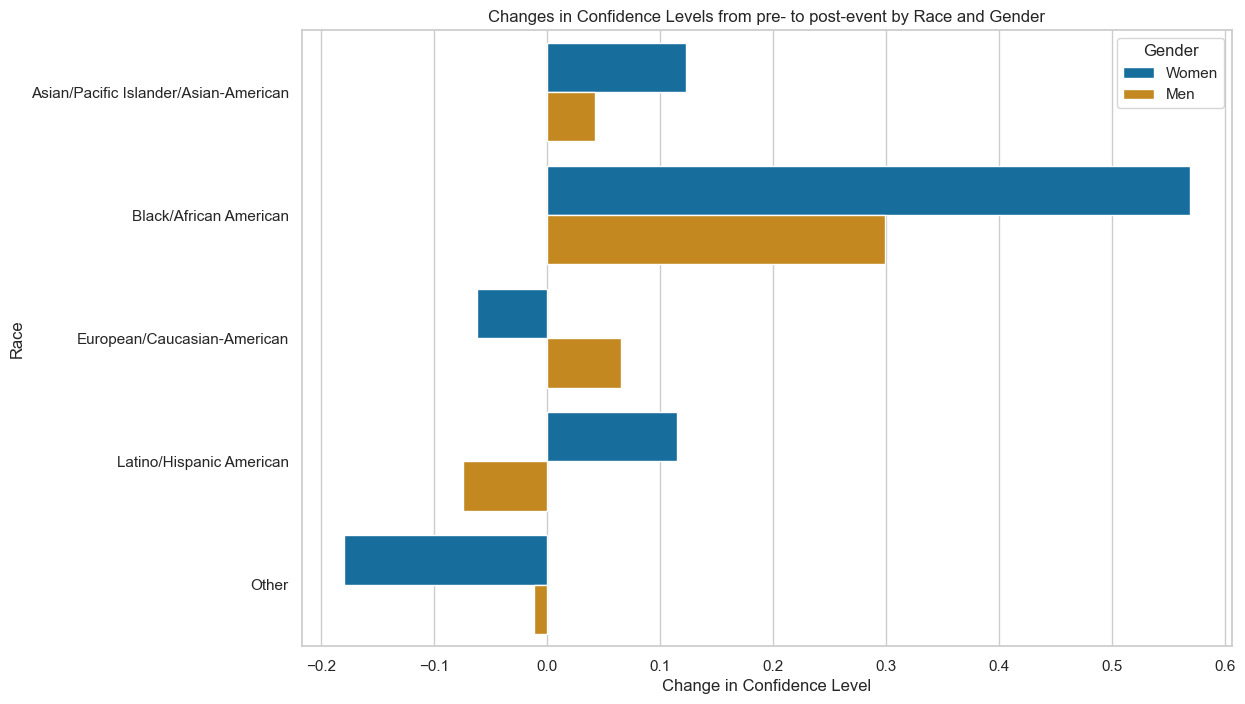

In [127]:
# Calculate the difference between Satisfaction score and Optimism score by race for men and women
confidence_level_change_women = post_event_confidence_levels_by_race_women - pre_event_confidence_levels_by_race_women
confidence_level_change_men = post_event_confidence_levels_by_race_men - pre_event_confidence_levels_by_race_men

# Convert the differences into a DataFrame
confidence_level_change_df = pd.DataFrame({
    "Race": confidence_level_change_women.index,  # Get race categories
    "Women": confidence_level_change_women.values,
    "Men": confidence_level_change_men.values
})

# Melt the DataFrame for visualisation
confidence_level_change_melted = confidence_level_change_df.melt(
    id_vars="Race", var_name="Gender", value_name="Change in Confidence Level post-event (attr3_2 - attr3_1)"
)

# Plot the differences
plt.figure(figsize=(12, 8))
sns.barplot(data=confidence_level_change_melted, x="Change in Confidence Level post-event (attr3_2 - attr3_1)", y="Race", hue="Gender", palette="colorblind")
plt.title("Changes in Confidence Levels from pre- to post-event by Race and Gender")
plt.xlabel("Change in Confidence Level")
plt.ylabel("Race")
plt.legend(title="Gender")
plt.show()


Changes in confidence levels are very slight and are less than 0.2% in either direction overall, meaning that it is difficult to draw any firm conclusions from most of these findings.

The one potentially significant detail is a positive 0.6% change in confidence levels for black men and a positive 0.3% shift for black women, showing that both groups evaluated themselves as being more attractive after the event. This could be caused in part by these groups' comparatively high match rates, which may have helped positively shift how people in these groups felt about themselves after the event.

This shift in Black/African American participants' sense of attractiveness is much greater than any other positive or negative shift experienced by members of other groups. As seen above, it is accompanied by a positive shift (large in the case of Black/African American men, more modest in the case of their female counterparts) in their levels of satisfaction with the dating experience vs. their expectations prior to the event.

While it is still a modest shift, this positive change in self-evaluated attractiveness after the event suggests that when participants in a particular racial group experience higher match rates, their sense of self-confidence may increase too. Further statistical tests and experimentation with varying match rates would be needed in order to establish whether or not this conclusion is correct.

It would be interesting to conduct further investigations into why female participants in this category experience slightly more muted improvements in levels of satisfaction and self-confidence compared to men of the same race.

Once more, let's check to see if these findings are statistically significant.

#### **5.6.1 Hypothesis test: Change in confidence levels by race**

In the previous graph, wanted to find out whether participants from different racial groups experienced different shifts in self-confidence as a result of the speed dating event.

To hypothesis test this, we will calculate the change in each participant's self-rated attractiveness (confidence level) from before to after the event, using the formula:
`attr3_2` - `attr3_1`.

We will then run a Kruskal-Wallis test separately for women and men, to see if those changes differed by race.

In [128]:
# Add a new column: confidence change
df["confidence_change"] = df["attr3_2"] - df["attr3_1"]

# Function to run Kruskal-Wallis test on change in confidence
def kruskal_conf_change_by_race(df, gender_code):
    subset = df[df["gender"] == gender_code]
    groups = [group["confidence_change"].dropna().values for name, group in subset.groupby("race")]
    stat, p = kruskal(*groups)
    return stat, p

# Run test for women (gender = 0) and men (gender = 1)
stat_women, p_women = kruskal_conf_change_by_race(df, 0)
stat_men, p_men = kruskal_conf_change_by_race(df, 1)

# Print results
print(f"Change in Confidence (Women): Test Statistic = {stat_women:.4f}, p-value = {p_women:.4f}")
print(f"Change in Confidence (Men): Test Statistic = {stat_men:.4f}, p-value = {p_men:.4f}")


Change in Confidence (Women): Test Statistic = 80.7754, p-value = 0.0000
Change in Confidence (Men): Test Statistic = 25.5499, p-value = 0.0000


##### **Interpretation of Results**
Since the p-values are well below 0.05, we can confidently reject the null hypothesis in both cases.

This means that:

- The difference in confidence level change between racial groups is **statistically significant**, for both women and men.

- In other words, it's very unlikely that these differences are due to random chance.

This supports our earlier visual findings — particularly that Black/African American participants reported the strongest increases in self-confidence post-event, while changes in other groups were smaller or more neutral.

## 5.7 Investigating factors correlated with match success

We have established at this point that racial disparities in match rates, levels of reciprocated interest and overall satisfaction with the dating experience exist to a certain extent within this dataset. Different racial groups' satisfaction with the speed dating process - and ultimately their trust in it and their willingness to engage in it again in the future - may be helped or harmed by some of these factors.

We have also established that some racial groups experience some level of discrimination when it comes to selection by the opposite sex as a potential date.

The question is, can we leverage non-demographic factors - like shared interests or personality traits - to boost match rates in a fairer, less superficial way?

Which factors correlate the most with a successful match?


In [129]:
selected_columns = [
    "samerace", "race", "race_o", "imprace", "age", "age_o",
    "zipcode", "income", "field_cd", "prob", "exphappy", "satis_2",
    "attr3_1", "attr3_2", "attr", "sinc", "intel", "fun", "amb", "shar"
]

C:\Users\nedch\AppData\Local\Temp\ipykernel_19580\2288114151.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




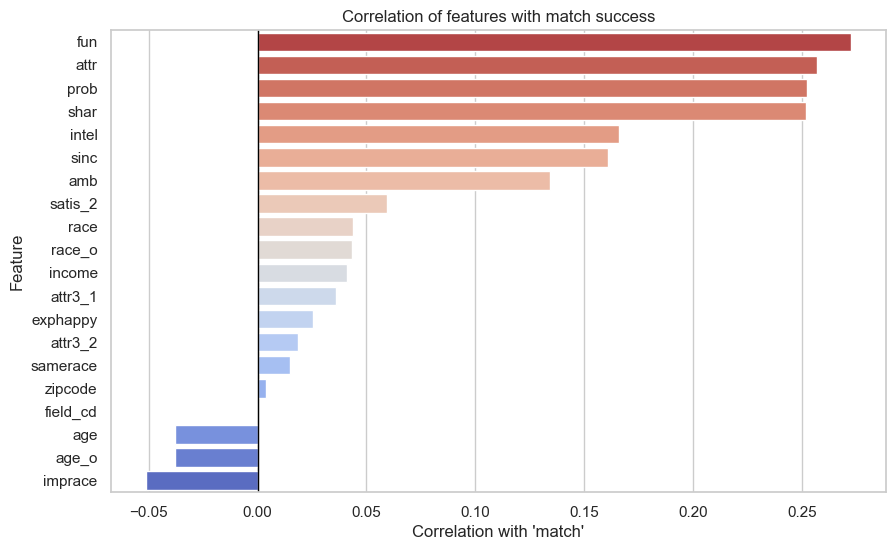

In [130]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables into numbers
categorical_cols = ["race", "race_o", "field_cd", "zipcode"]
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded[selected_columns + ["match"]].corr()

# Extract correlations with "match"
match_correlations = correlation_matrix["match"].drop("match").sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=match_correlations.values, y=match_correlations.index, palette="coolwarm_r")

# Labels and title
plt.xlabel("Correlation with 'match'")
plt.ylabel("Feature")
plt.title("Correlation of features with match success")
plt.axvline(0, color="black", linewidth=1)  # Vertical reference line at 0

plt.show()


## **Insights** - what makes a successful match?

- A sense of `fun` is the most highly correlated feature with a successful match - meaning that people who score higher on this personality attribute are more likely to have a successful dating experience.
- Attractiveness (`attr`) comes second - but this appears not to be closely linked to `race`, which is only very weakly correlated with match rate.
- If you've got a feeling that your date went well (`prob`), the chances are that it did, and that a `match` is on its way.
- Shared interests `shar` are also strongly correlated with a match, only bested by `fun` and `attr`activeness.
- `intel`ligence, `sinc`erity and `amb`ition also have some correlation with match success, but `fun` and `shar`ed interests are more important.
- `race`, `income` and `zipcode` are only very weakly correlated with a successful match: in dating, your personality is still much more important than the colour of your skin, your parents' bank balance or where you are from.
- What participants studied (`field_cd`) had almost no impact at all on whether or not they got a match: taking a BA in English Literature may not be the best way to land a job at Google, but it won't hurt your chances of getting a date.
- `age` has a weak negative correlation with `match`, suggesting that some slight ageism towards older participants did exist in this speed dating event - but it's still a fairly weak correlation.
- Finally, `imprace` is slightly negatively correlated with `match` success, indicating that people who consciously discriminate according to race in dating are lowering their chances of finding a match.



---

# **6. Summary of insights**

This exploratory analysis of speed dating data reveals three key insights into modern dating:

### **1️⃣ Hidden biases shape dating outcomes**
- Statistical testing (Kruskal-Wallis, p < 0.0001) confirms that race significantly influences match success for both men and women.
- Racial biases clearly affect decision-making in speed dating, rather than being merely incidental.

### **2️⃣ Fun, attractiveness, and shared interests strongly predict match success**
- Personality traits ("Fun") emerged as the strongest predictor of successful matches.
- Attractiveness also strongly influences success, indicating that physical attraction remains highly important.
- Compatibility factors (e.g., shared interests) also significantly contribute to match success, emphasising the importance of interpersonal chemistry.
- These findings suggest that **meaningful personal interactions can overcome more superficial barriers**, leading to genuine interest and engagement.

### **3️⃣ Match rates positively influence participant confidence**
- Participants who receive more matches report higher confidence levels post-event, highlighting a feedback loop where dating success positively reinforces self-perception.
- Matches don't merely represent potential relationships — they actively boost participants' confidence and optimism.
- This positive reinforcement cycle shows the **broader psychological benefits of inclusive, compatibility-focused matchmaking**.

---

# **7. Recommendations for Tinder 🔥**

### **🔵 1️⃣ Adapt recommendations to legal contexts & respect ethical constraints**

- Ensure all recommendations align with the legal frameworks of countries where Tinder operates, especially regarding sensitive demographic data.
- Conduct regular legal and ethical reviews to ensure compliance with evolving data privacy and discrimination laws.

### **🔵 2️⃣  Limit sensitive demographic user data collection**

- Strictly avoid collecting data explicitly linked to protected attributes like race or ethnicity.
- Regularly audit the platform to identify and mitigate any inadvertent inference or indirect collection of demographic data.

### **🔵 3️⃣ Actively shift user focus towards compatibility and personality**

- Redesign UX/UI components to encourage users explicitly to highlight and prioritise non-demographic attributes such as personality, shared interests, values, and life goals in profiles.
- Introduce deliberate UX "nudges" or prompts during profile creation and swiping to reinforce users' attention on deeper, more meaningful factors rather than superficial or demographic characteristics.
- Promote stories and testimonials within the app that emphasise successful matches based on deeper compatibility rather than appearance or demographic similarity.

### **🔵 4️⃣  Enforce clear guidelines to minimise discrimination potential**

- Explicitly prohibit users from referencing race, ethnicity, or specific physical attributes in profiles.

    - Regularly review and update moderation guidelines to address emerging discriminatory language or trends.
    - Provide educational resources or prompts about implicit bias when editing profiles or bios.
- Implement consistent, transparent enforcement procedures with clear accountability (e.g., moderated edits, user warnings, and potential suspensions for repeated violations).

### **🔵 5️⃣ Enhance algorithm transparency and user control**

- Clearly explain how the matching algorithm functions, including transparency about factors influencing recommended matches.
- Allow users greater control and agency, providing the option to:
    - Adjust weighting given to various compatibility attributes.
    - Opt out of recommendations that appear to rely on superficial or potentially biased characteristics.
- Offer user-facing tools to personalise match criteria actively, empowering users to prioritise meaningful compatibility factors.

### **🔵 6️⃣ Avoid bias-prone image recognition**

- Exercise extreme caution if implementing image-recognition algorithms, which can embed unintended racial or physical biases.
- Clearly communicate the inherent limitations and potential biases of image recognition technology to users.
- Provide users with explicit consent mechanisms and the option to disable automated image recognition features entirely.

### **🔵 7️⃣ Monitor and address biases continuously**
- Actively monitor match rates and user feedback by demographic factors (where ethically and legally feasible), utilising anonymised and aggregate-level analyses to identify and mitigate implicit biases in algorithmic recommendations.
- Regularly assess long-term user outcomes (relationship success, user satisfaction, and retention) rather than focusing solely on immediate match rates.
- Engage proactively with former users via targeted follow-up surveys or campaigns to understand better whether implicit biases contributed to dissatisfaction or churn.
- Continuously adapt the algorithm and user experience design based on these insights, with the explicit goal of fostering inclusive, genuine, and lasting connections.

---

# **8. Suggestions for further analysis**

#### 1️⃣ **Conduct qualitative research to deeply understand satisfaction gaps:**

- Conduct targeted interviews or focus groups with participants experiencing lower satisfaction to gain detailed insights into their experiences.
- Explicitly explore how perceived racial bias or discrimination influences satisfaction, confidence, and willingness to engage further with dating platforms.
- Extend the analysis to investigate discrimination or stereotyping experiences based on additional attributes such as religion, age, sex, sexual orientation, gender identity, or disability.

#### 2️⃣ **Improve data quality and representativeness:**

- Collect up-to-date, representative, and more comprehensive data by repeating or expanding this study beyond the university student demographic.
- Ensure data includes participants who represent diverse racial, ethnic, cultural, and socioeconomic backgrounds to further investigate biases.
- Expand the study explicitly to include and represent a wider range of sexual orientations and gender identities, enabling deeper analysis of preferences within the LGBTQIA+ community.

#### 3️⃣ **Evaluate long-term relationship outcomes:**

- Track matched participants beyond initial dates to understand factors influencing relationship longevity and satisfaction.
- Identify whether biases observed in initial matching stages persist into longer-term interactions, potentially impacting relationship success.

#### 4️⃣ **Investigate UX interventions for improving low-confidence user experiences:**

- Examine whether targeted UX improvements designed to enhance user engagement, confidence, and visibility can mitigate biases or improve experiences for users from underrepresented or disadvantaged groups.
- Specifically test and measure interventions such as personalised recommendations, confidence-building nudges, or profile visibility enhancements to assess their impact on dating satisfaction and long-term outcomes, particularly among users adversely affected by biases.



---

# **9. Conclusion**

This exploratory data analysis has provided a foundation for Tinder to better understand the factors influencing successful matches.

Implementing these recommendations and conducting further research in the suggested areas will support Tinder in delivering a fairer, more engaging, and more inclusive dating experience for all users.